Copyright 2021 Takehiro Ajioka

### Enviroment

Python 3.6
Anaconda
tensorflow-gpu==1.15.0
keras==2.3.1
shap==0.36.0
tfdeterminism==0.3.0

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from scipy import io
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, ConvLSTM2D, Bidirectional
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, roc_auc_score

In [2]:
# Allow grouth option of GPU
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [3]:
# Load data
signal = io.loadmat('../data/signal_5mice.mat')
runrest = io.loadmat('../data/runrest_5mice.mat')

In [4]:
plt.rcParams["font.size"] = 18

# Preprocess

In [5]:
# Mini-max normalization
def mini_max(dataset):
    min_value = dataset.min(axis=0)
    max_value = dataset.max(axis=0)
    dataset_nor = (dataset - min_value) / (max_value - min_value)
    return dataset_nor

In [6]:
# Create input data [-n,n+1]
def create_dataset(dataset, look_frame):
    dataX, dataY = [], []
    for i in range(look_frame,len(dataset)-(look_frame)):
        xset = []
        for j in range(dataset.shape[1]-1):
            a = dataset[(i-look_frame):(i+look_frame+1), j]
            xset.append(a)
        dataY.append(dataset[i, -1])      
        dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
def Data_preprocess(signal, runrest, look_frame):
    # Normalize
    signal = mini_max(signal.transpose())
    runrest = runrest.transpose()
    # Create dataset
    dataset = numpy.hstack([signal.astype('float32'), runrest.astype('float32')])
    X, Y = create_dataset(dataset, look_frame)
    return X, Y

In [8]:
def Get_Dataset(TRAIN, VALID, TEST, look_frame):
    
    # Training dataset
    print('TRAINING')
    trainX = numpy.empty([0,50,2*look_frame+1], dtype=numpy.float32)
    trainY = numpy.empty(0, dtype=numpy.float32)
    for i in TRAIN:
        print(f'Mouse {i}')
        for j in range(signal['signal'+str(i)].shape[1]):
            X, Y = Data_preprocess(signal['signal'+str(i)][0,j], runrest['runrest'+str(i)][0,j], look_frame)
            trainX = numpy.concatenate([trainX, X], axis=0)
            trainY = numpy.concatenate([trainY, Y], axis=0)

    # Validation dataset
    print('VALIDATION')
    validX = numpy.empty([0,50,2*look_frame+1], dtype=numpy.float32)
    validY =numpy.empty(0, dtype=numpy.float32)
    for i in VALID:
        print(f'Mouse {i}')
        for j in range(signal['signal'+str(i)].shape[1]):
            X, Y = Data_preprocess(signal['signal'+str(i)][0,j], runrest['runrest'+str(i)][0,j], look_frame)
            validX = numpy.concatenate([validX, X], axis=0)
            validY = numpy.concatenate([validY, Y], axis=0)

    return trainX, validX, trainY, validY

# Training

In [9]:
from Training_code_behavior import Learn_model

In [10]:
LookFrame = [5, 10, 15, 20, 25, 30]
ModelType = 'GRU'
folder = './models_N20_WindowExpand/'

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(737590, 50, 11)


Using TensorFlow backend.
TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


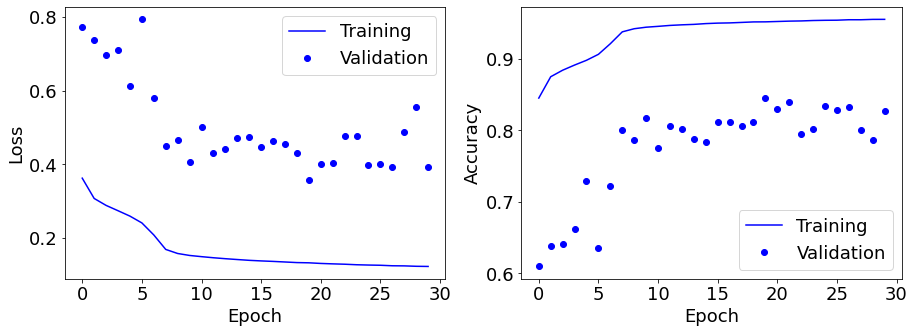

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(701610, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


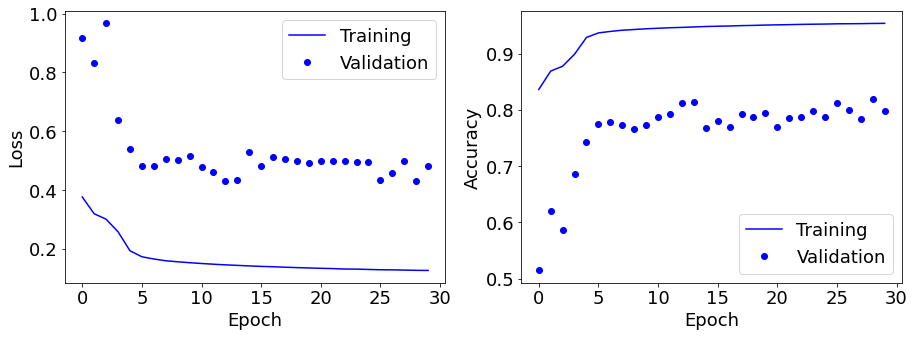

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(683620, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


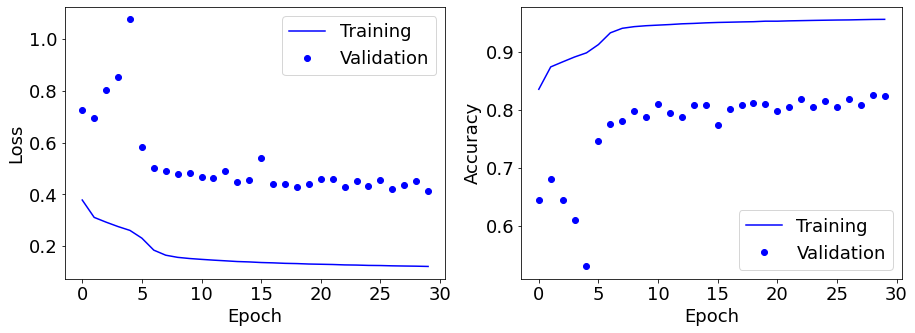

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(737590, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


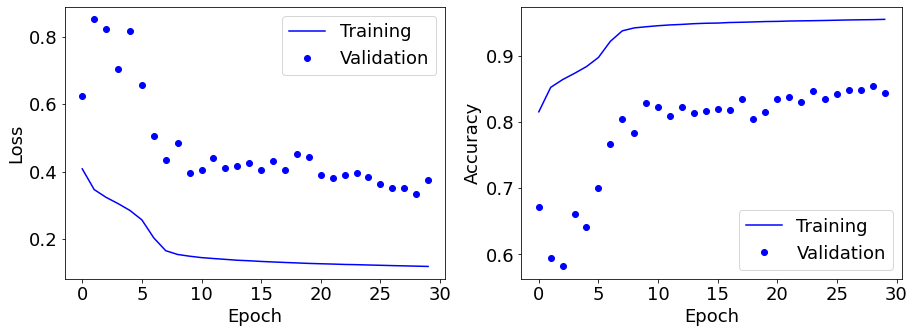

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(737590, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


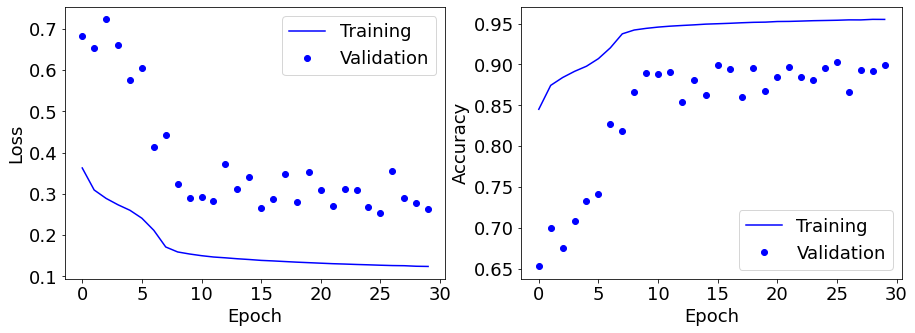

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(683620, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


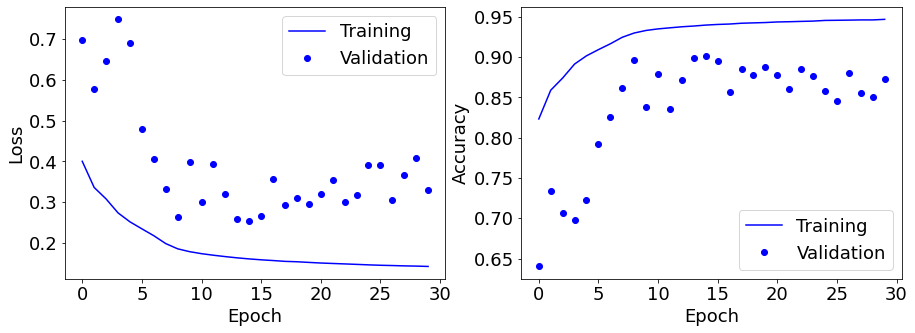

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(665630, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


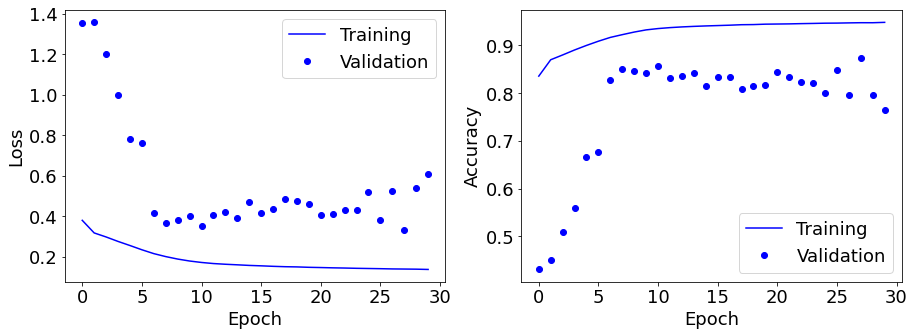

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(719600, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


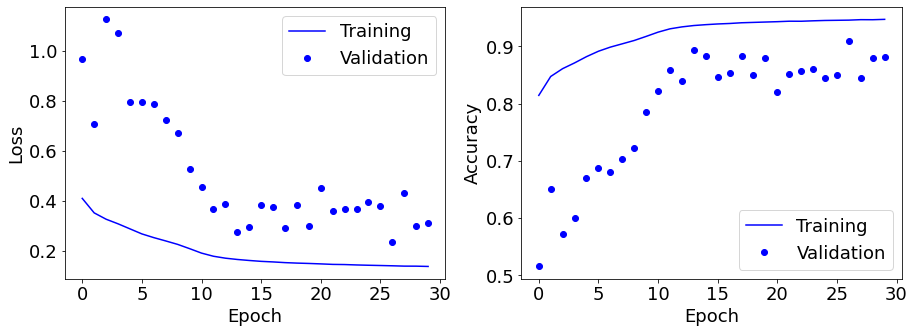

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(701610, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


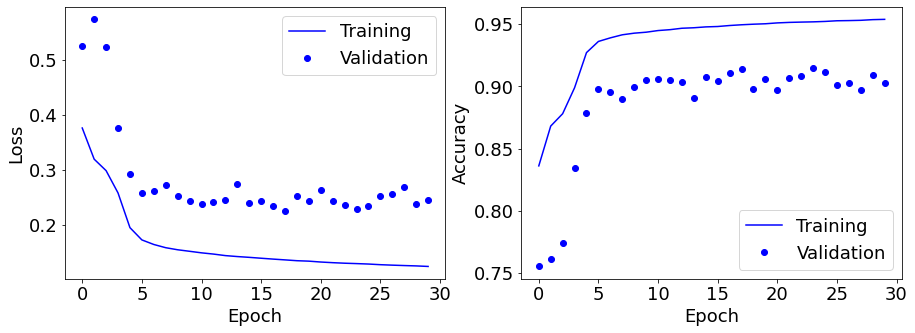

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(683620, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


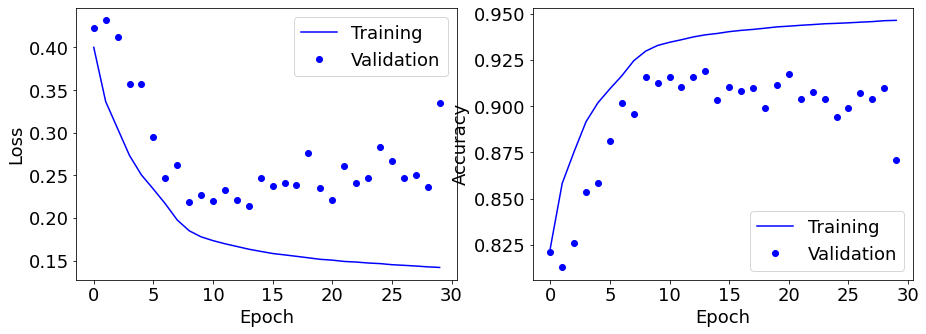

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
(629650, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


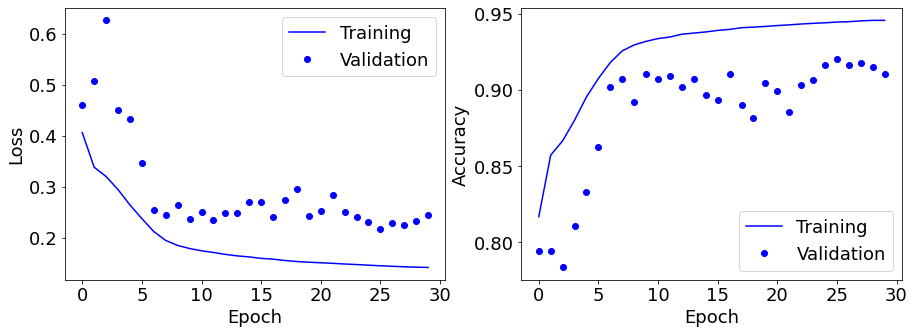

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
(683620, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


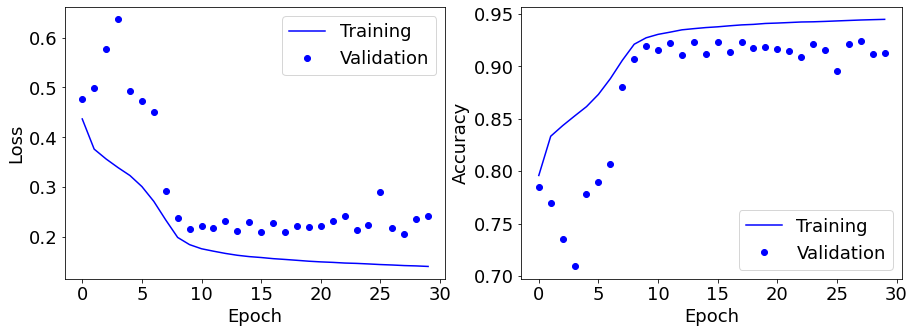

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(683620, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


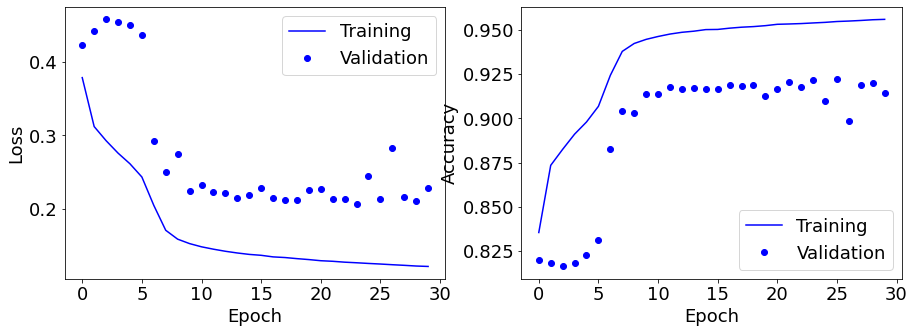

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(665630, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


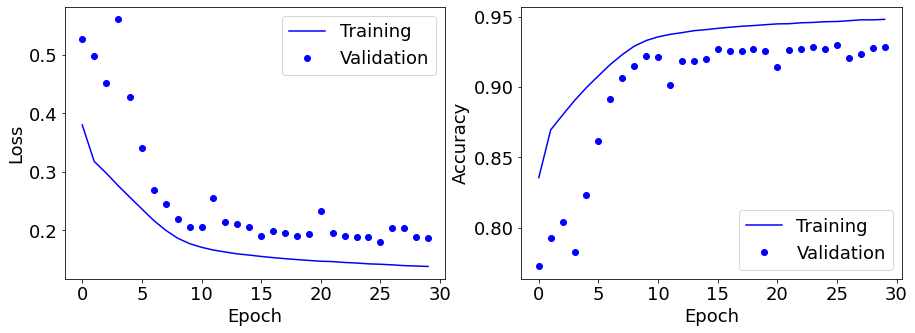

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
(629650, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


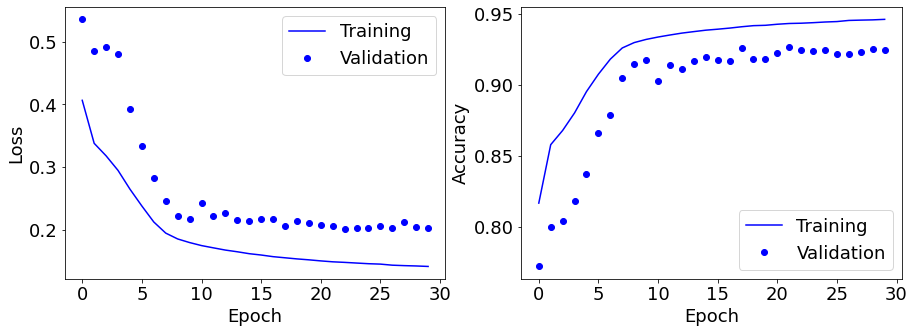

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
(665630, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


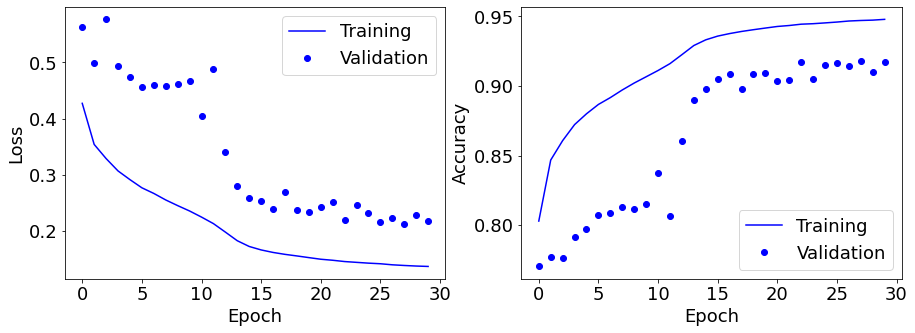

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(737590, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


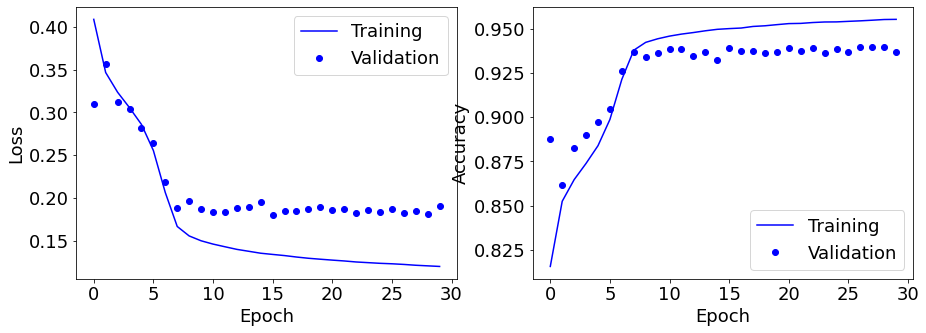

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(719600, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


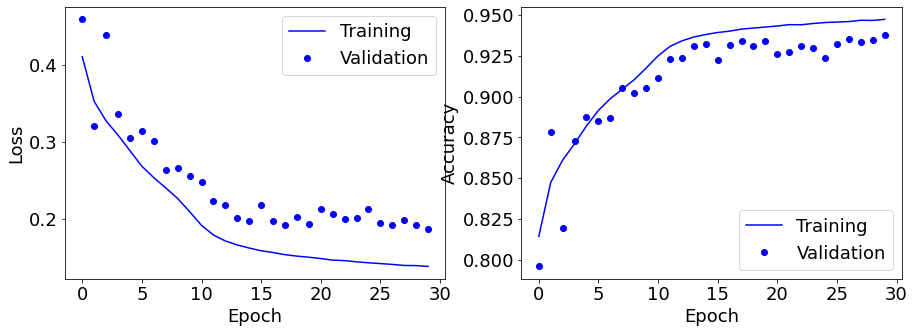

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
(683620, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


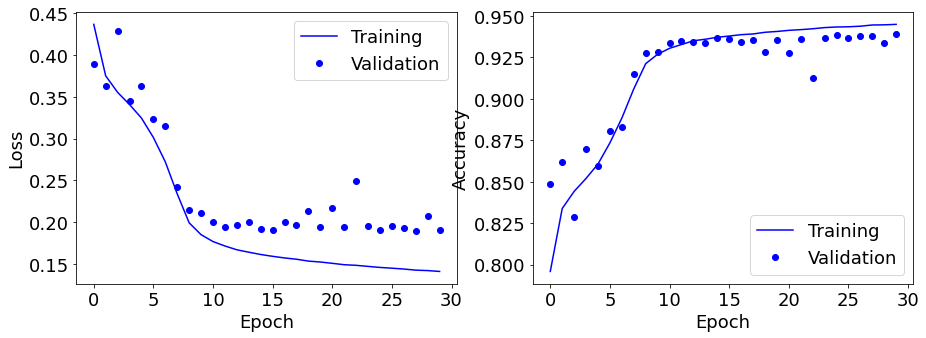

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
(665630, 50, 11)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


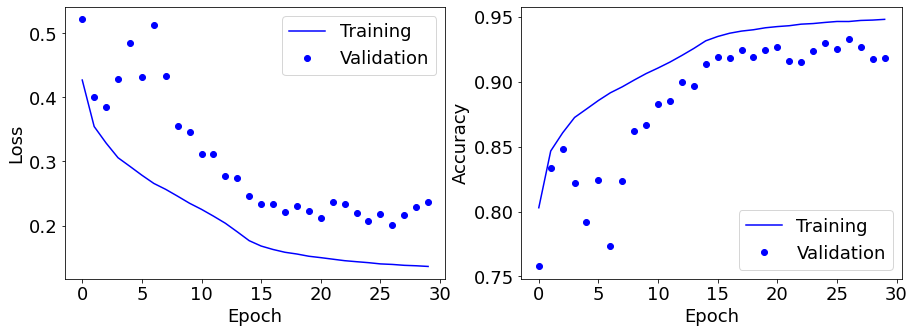

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(737180, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


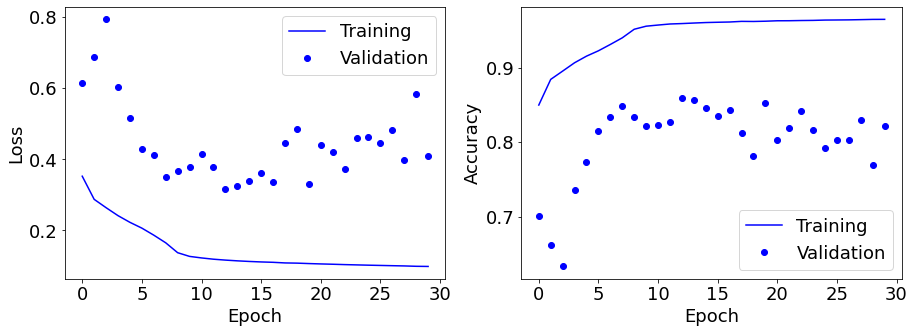

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(701220, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


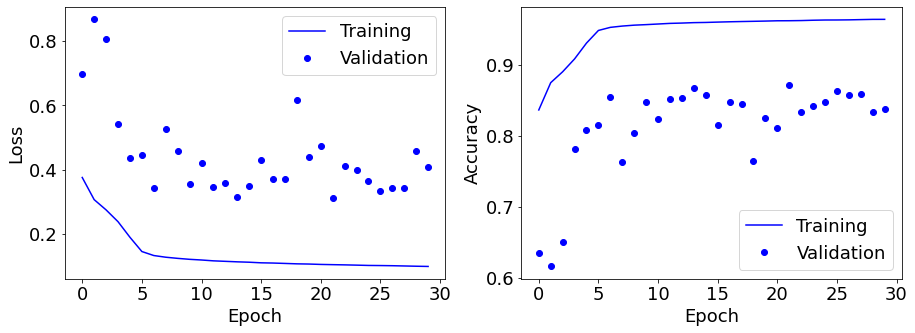

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(683240, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


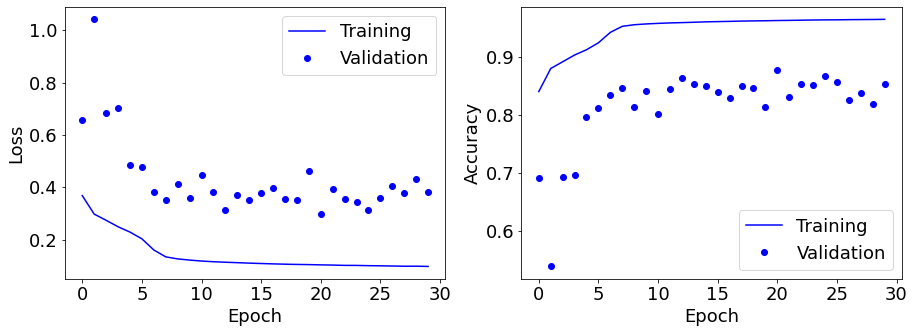

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(737180, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


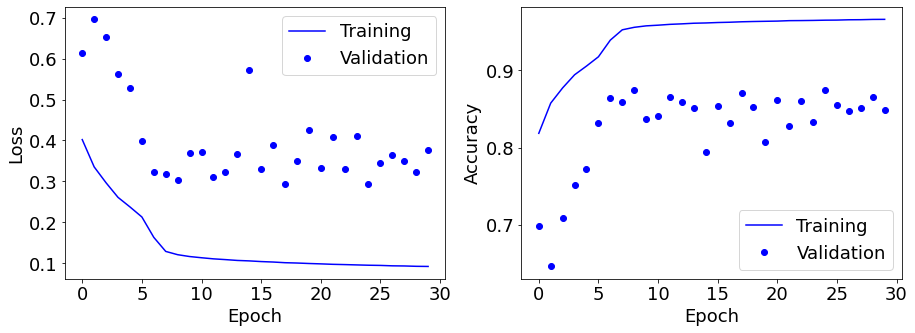

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(737180, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


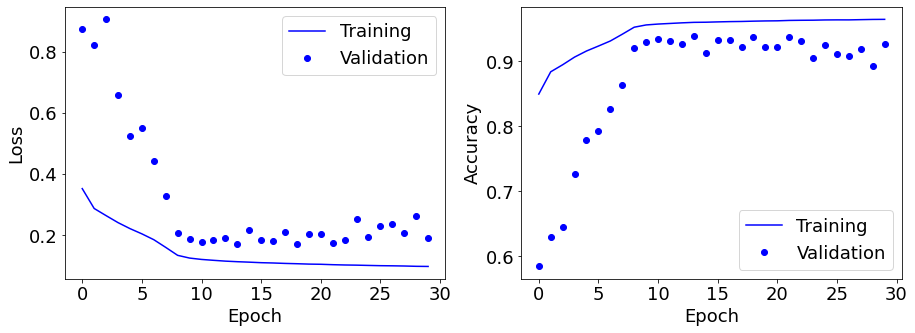

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(683240, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


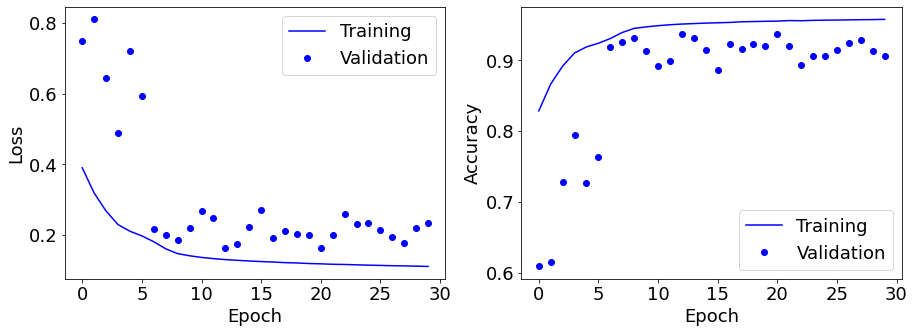

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(665260, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


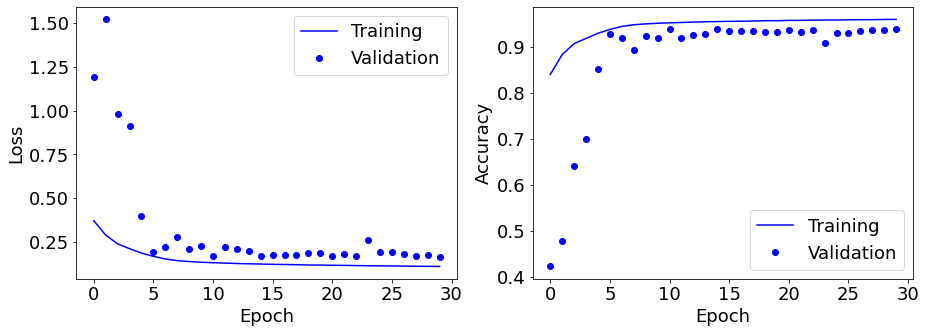

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(719200, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


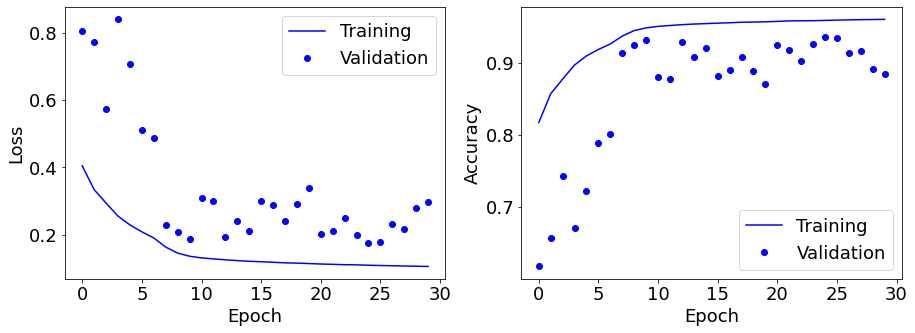

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(701220, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


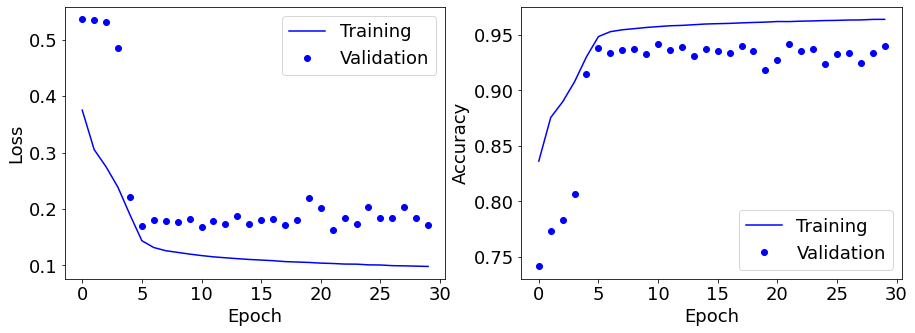

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(683240, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


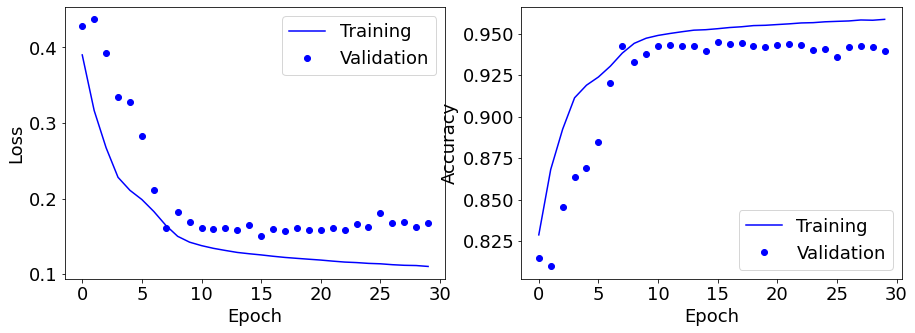

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
(629300, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


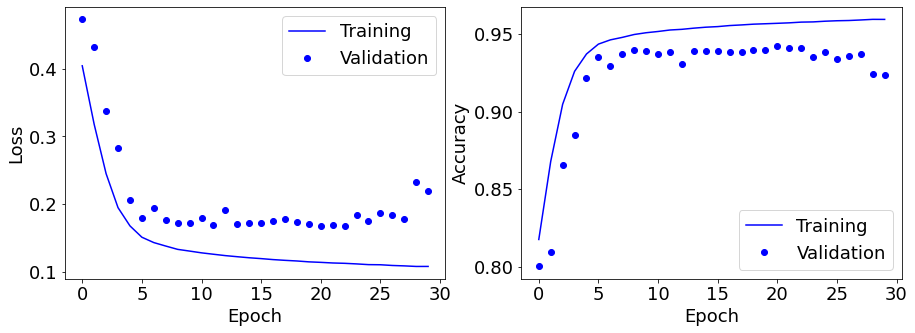

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
(683240, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


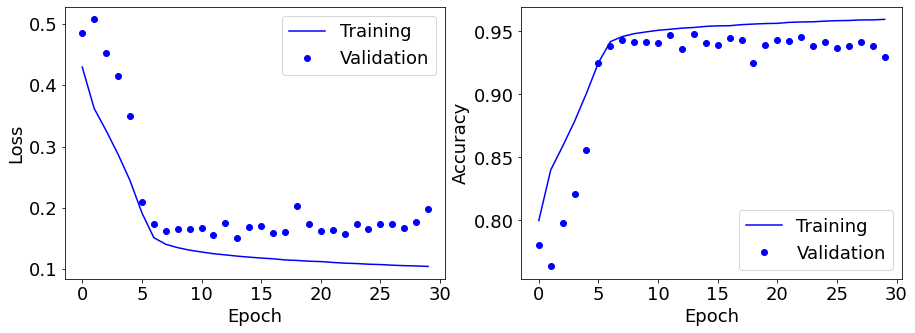

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(683240, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


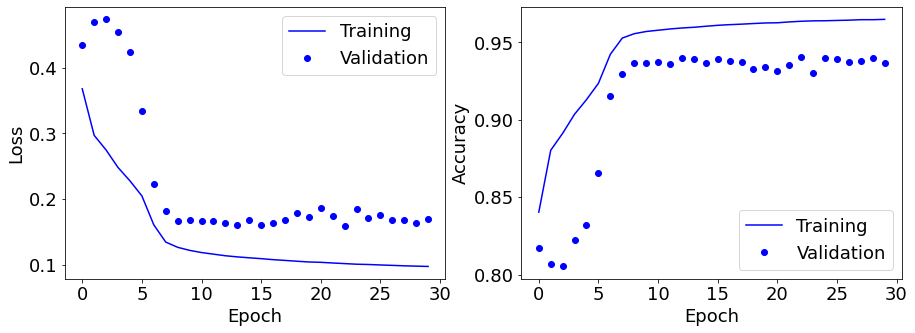

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(665260, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


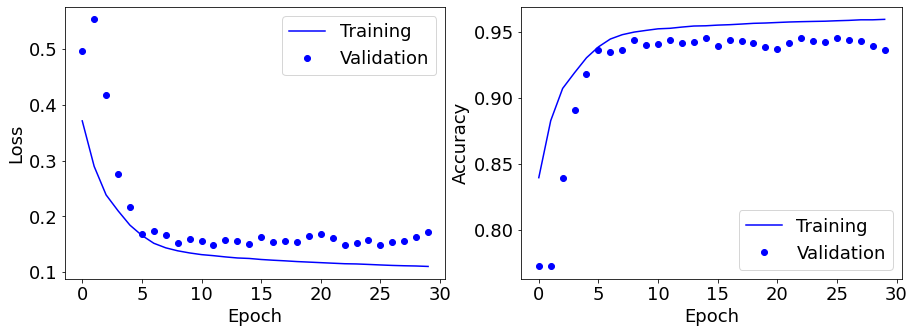

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
(629300, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


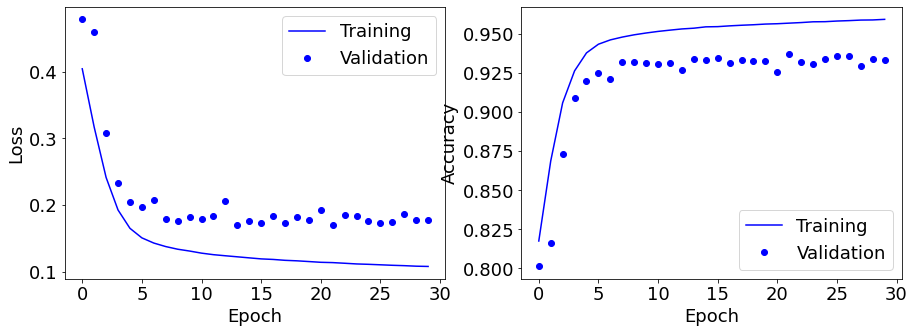

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
(665260, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


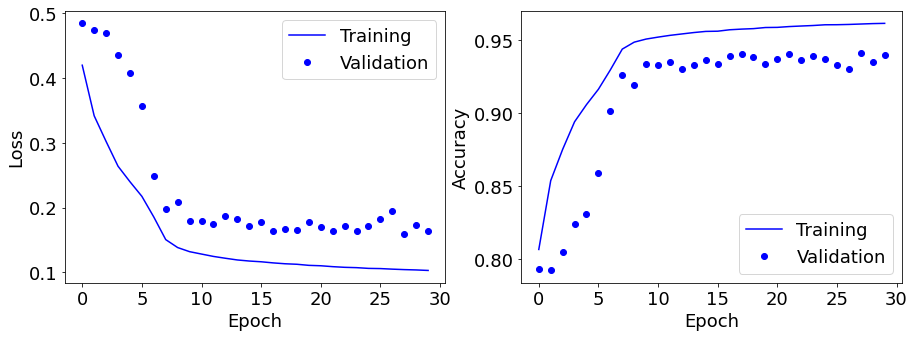

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(737180, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


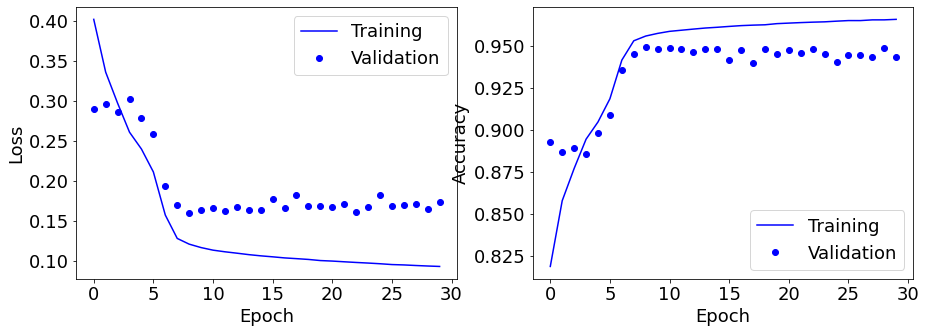

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(719200, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


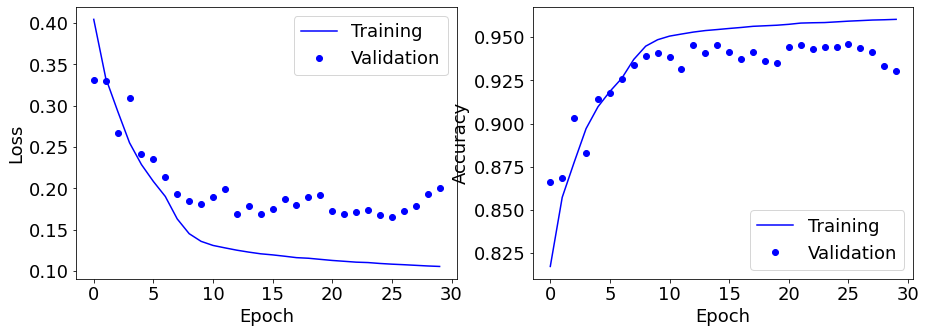

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
(683240, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


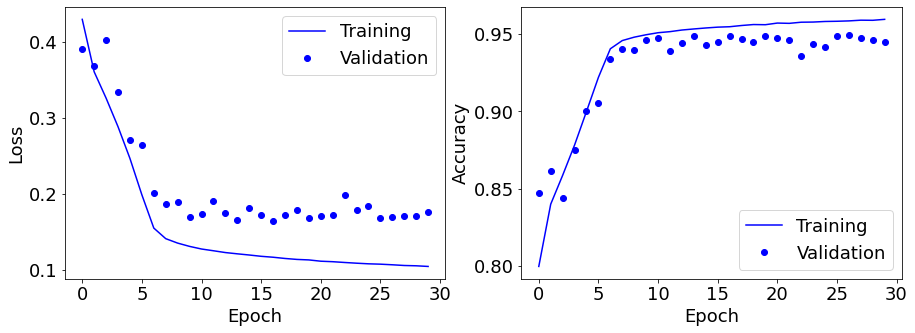

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
(665260, 50, 21)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


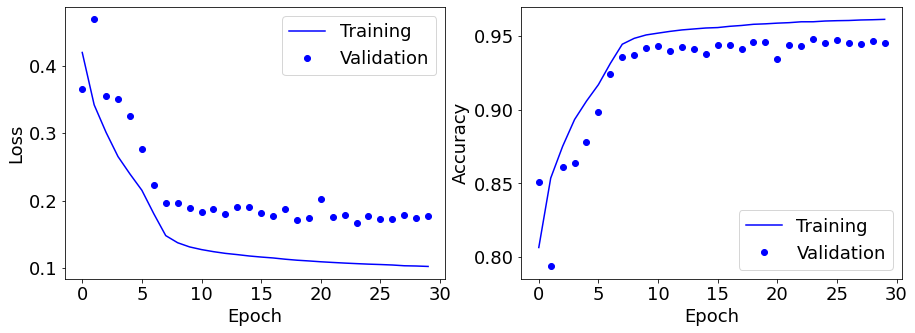

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(736770, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


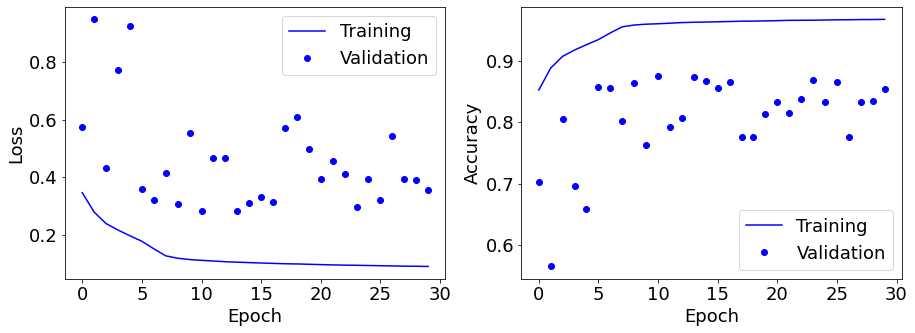

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(700830, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


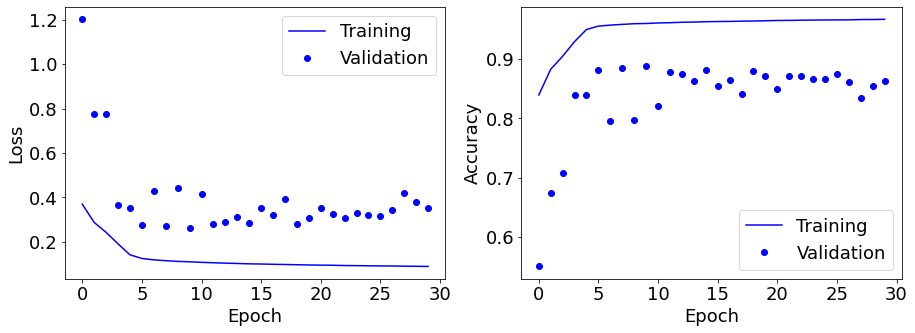

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(682860, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


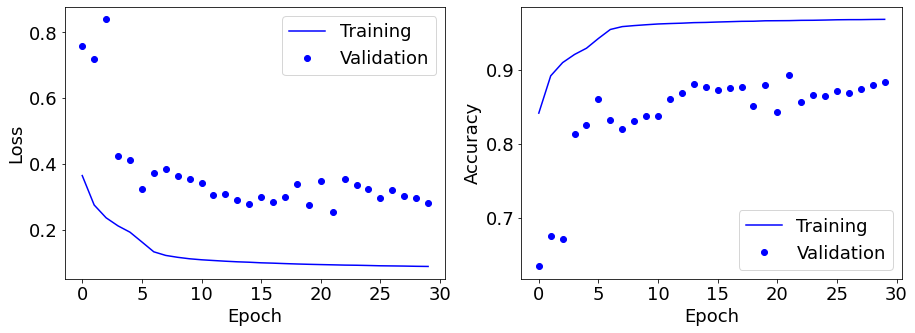

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(736770, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


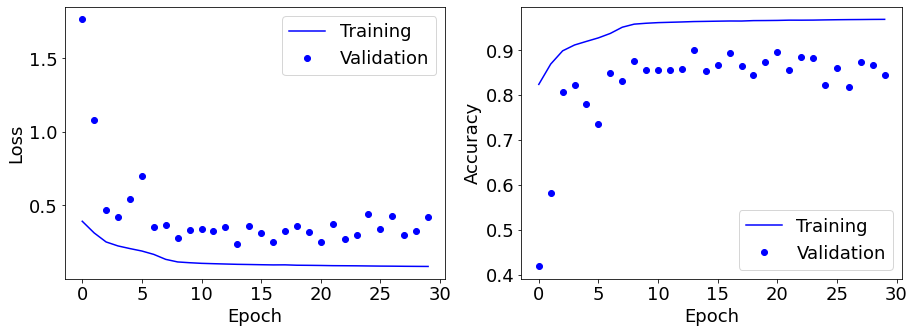

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(736770, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


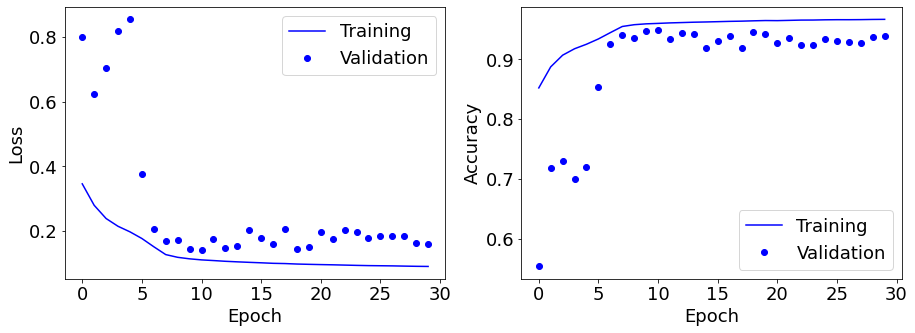

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(682860, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


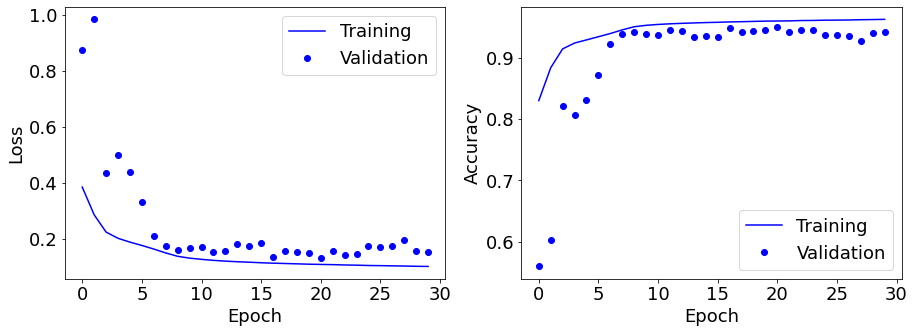

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(664890, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


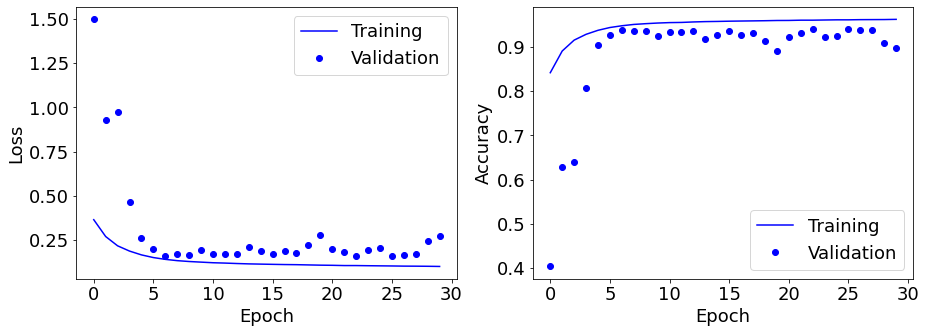

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(718800, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


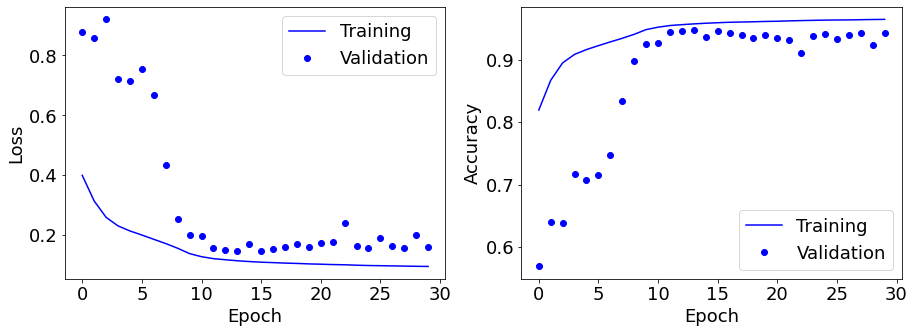

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(700830, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


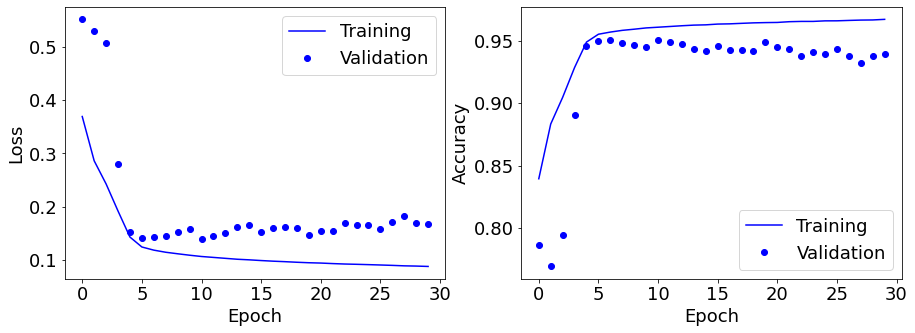

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(682860, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


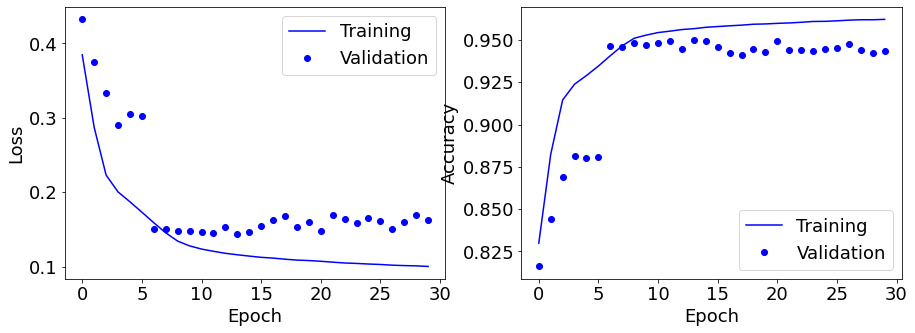

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
(628950, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


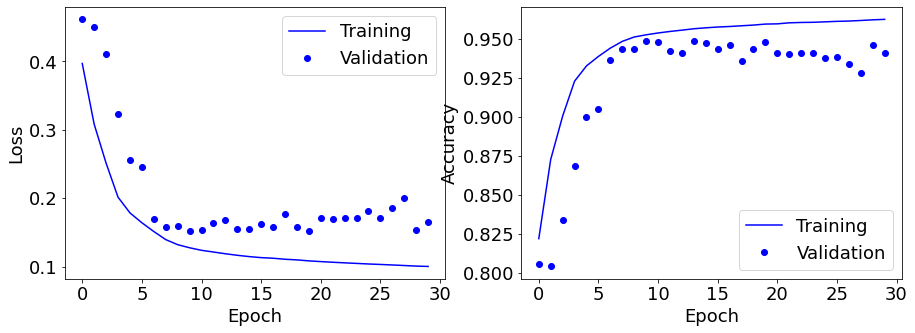

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
(682860, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


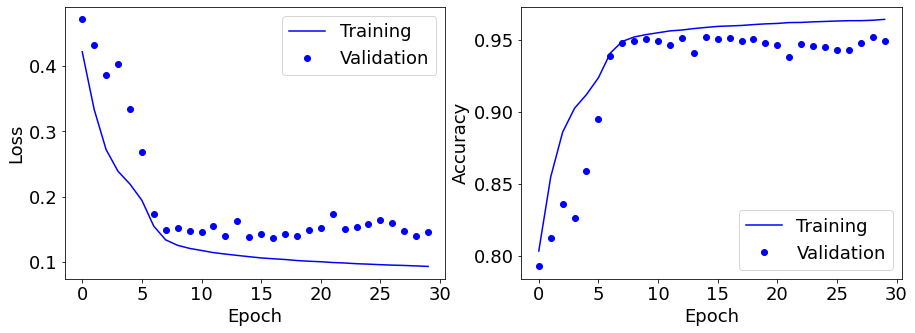

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(682860, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


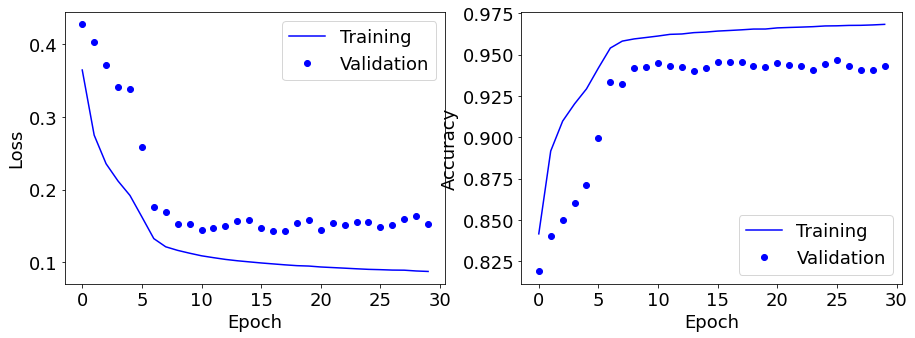

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(664890, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


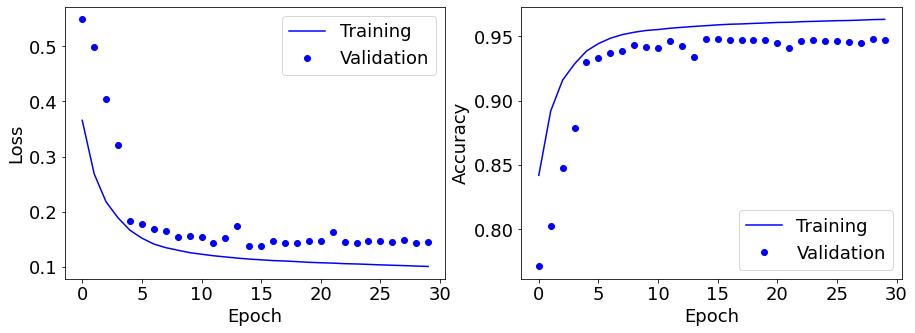

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
(628950, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


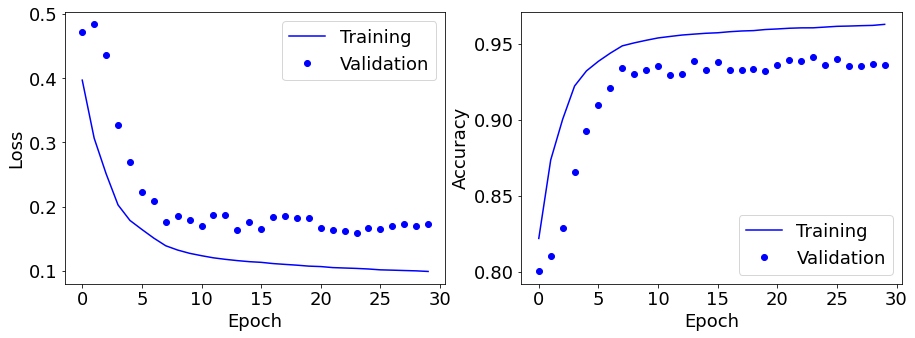

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
(664890, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


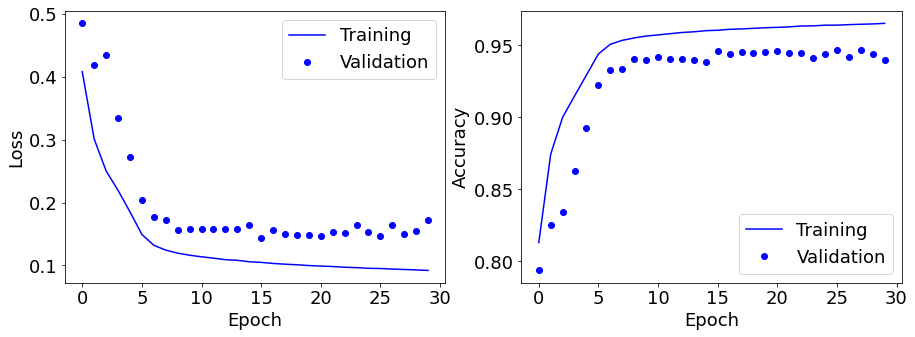

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(736770, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


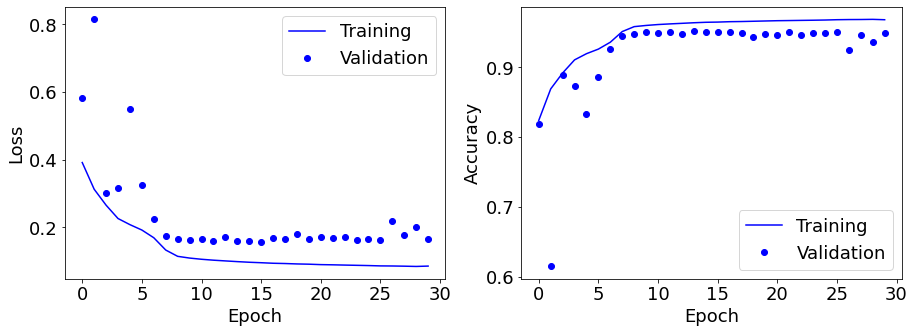

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(718800, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


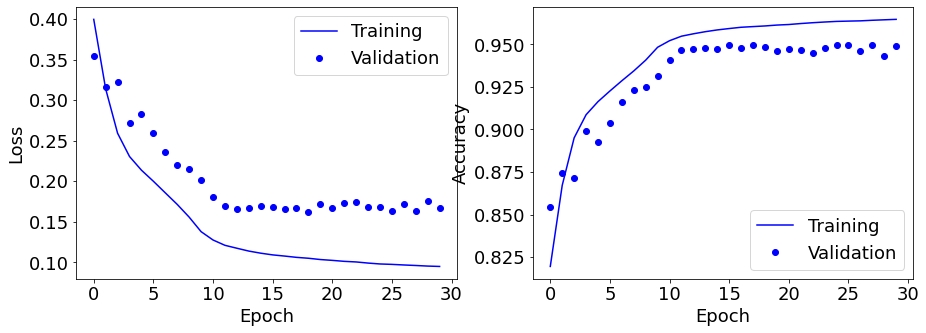

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
(682860, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


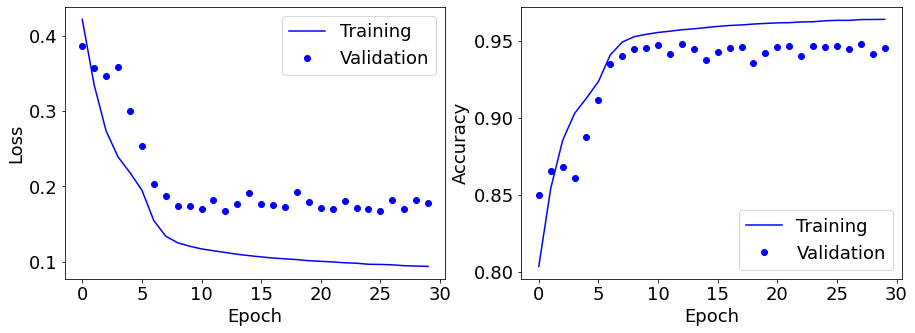

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
(664890, 50, 31)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


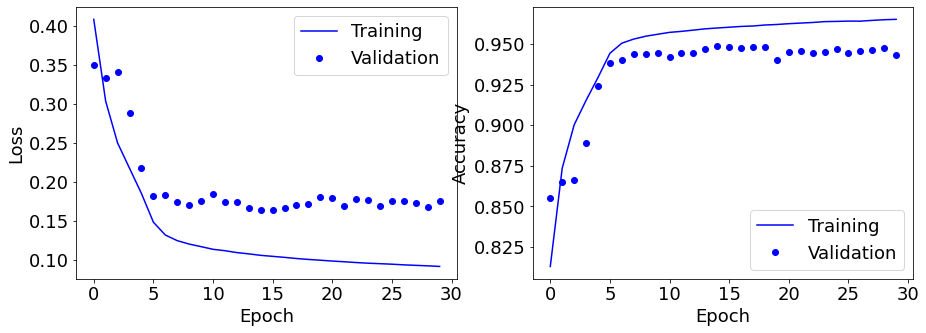

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(736360, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


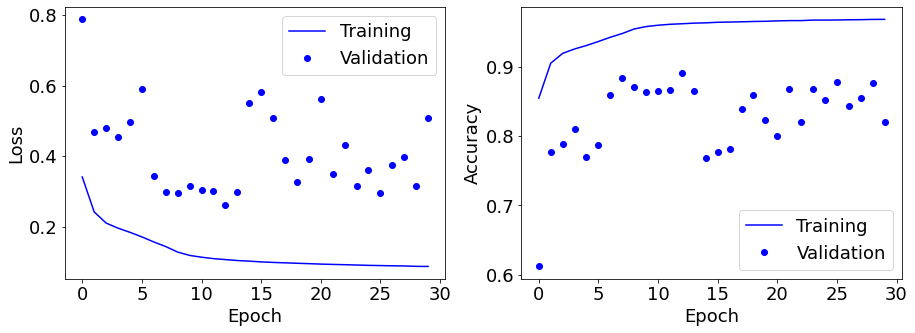

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(700440, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


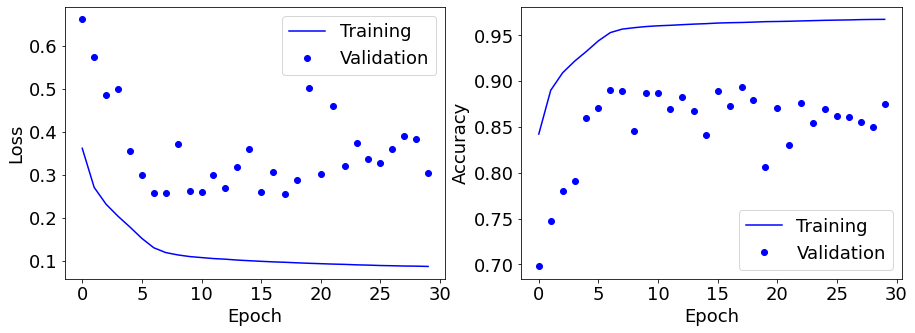

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(682480, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


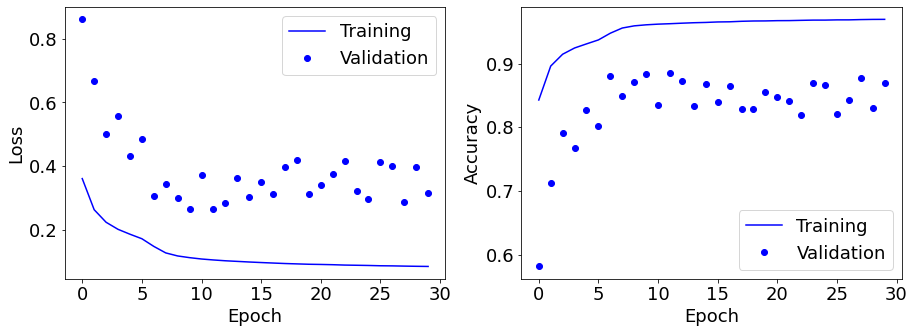

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(736360, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


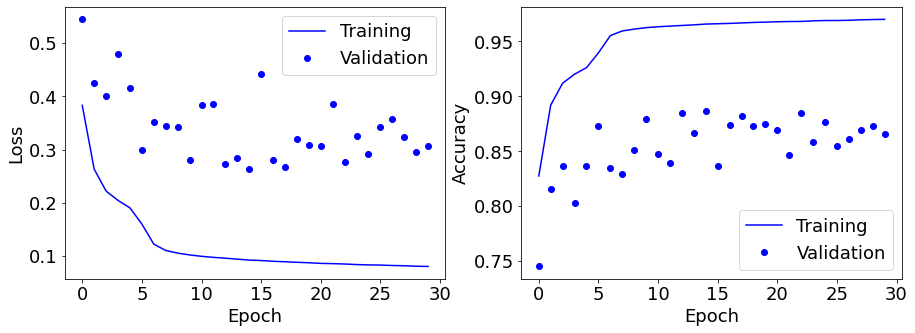

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(736360, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


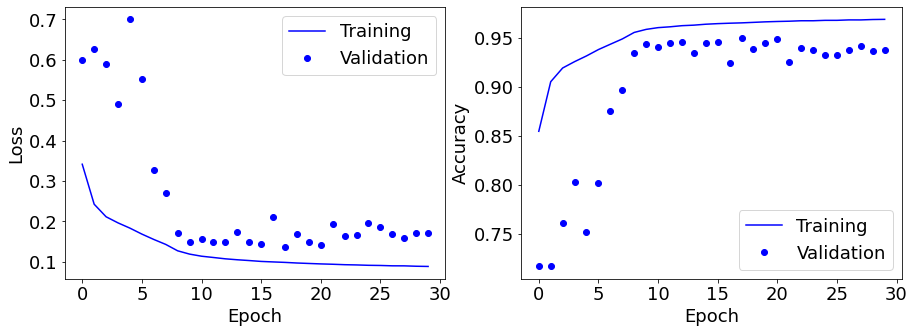

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(682480, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


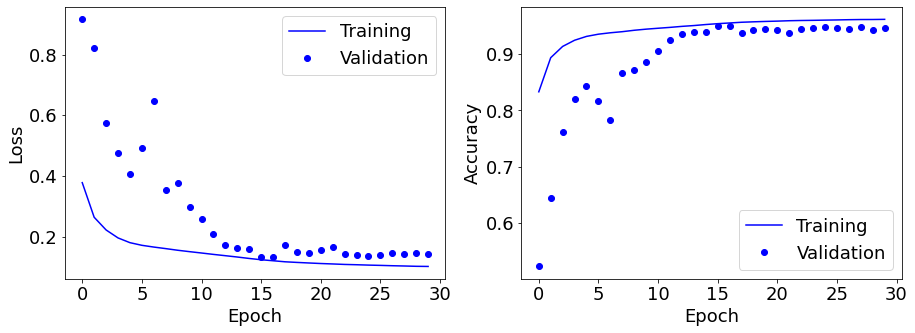

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(664520, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


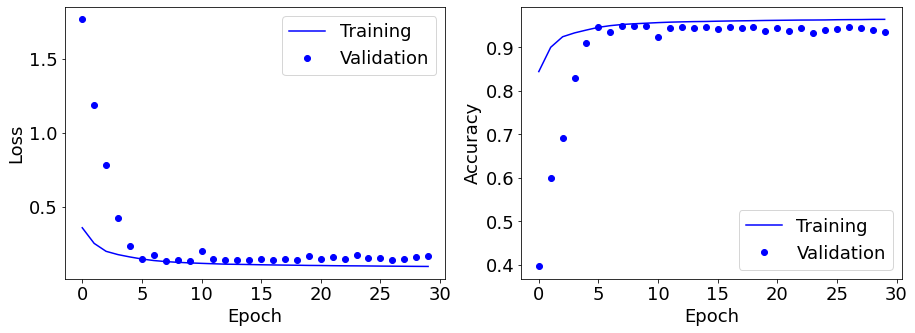

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(718400, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


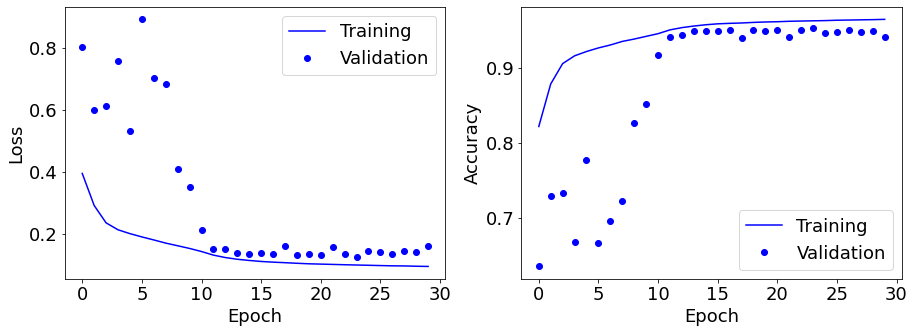

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(700440, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


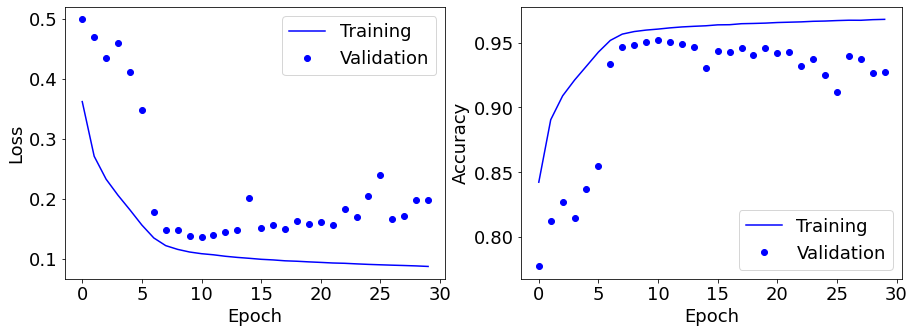

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(682480, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


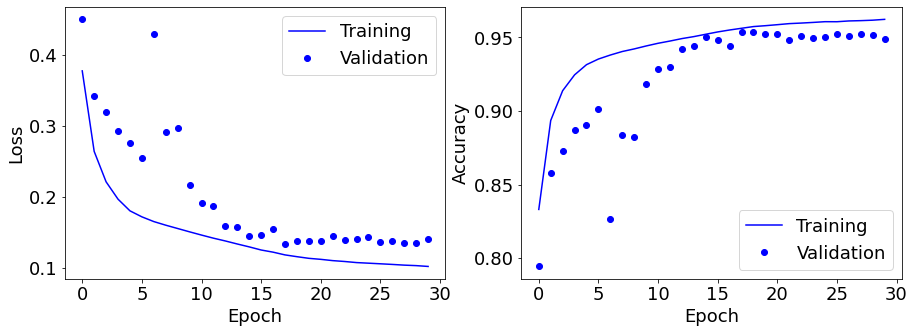

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
(628600, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


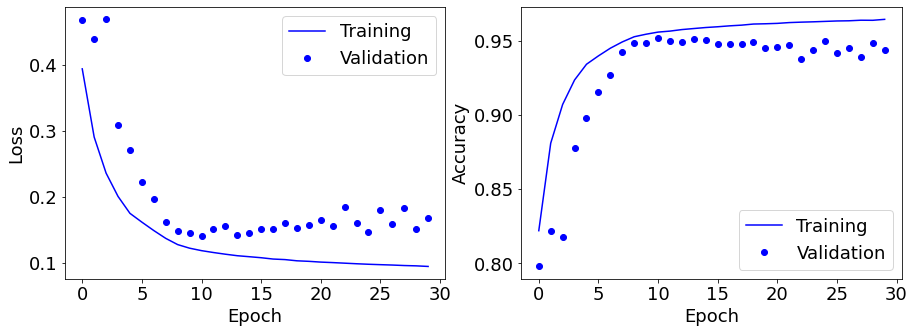

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
(682480, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


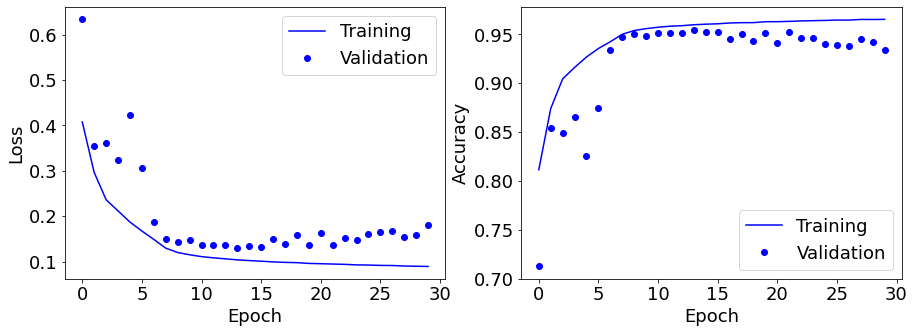

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(682480, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


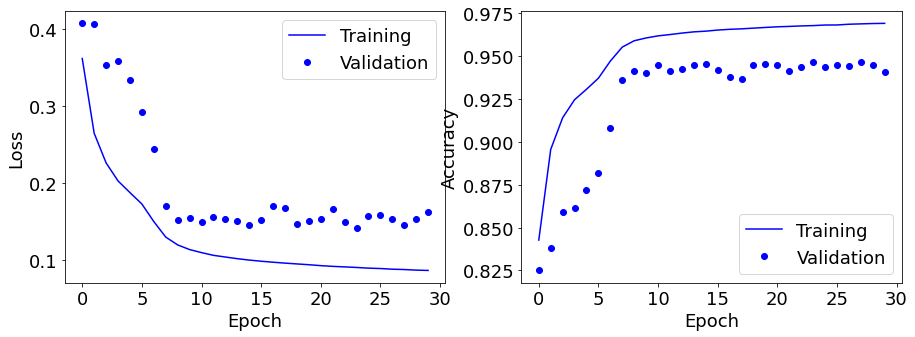

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(664520, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


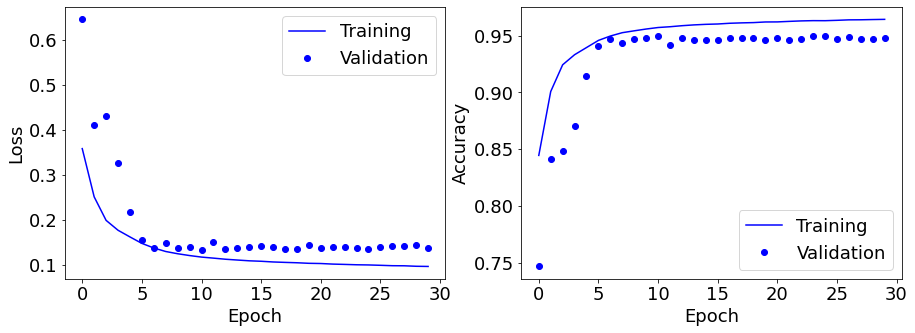

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
(628600, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


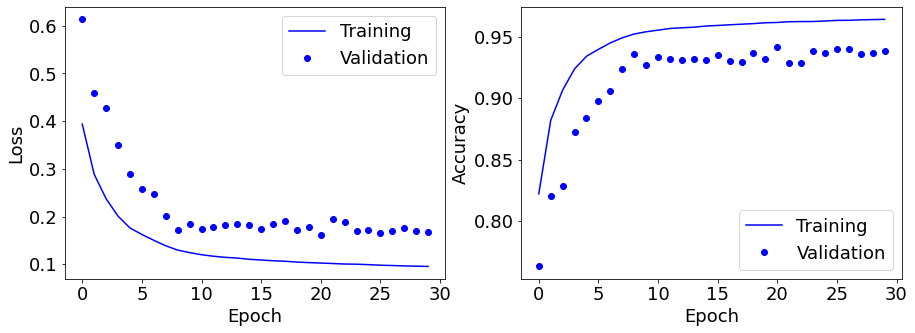

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
(664520, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


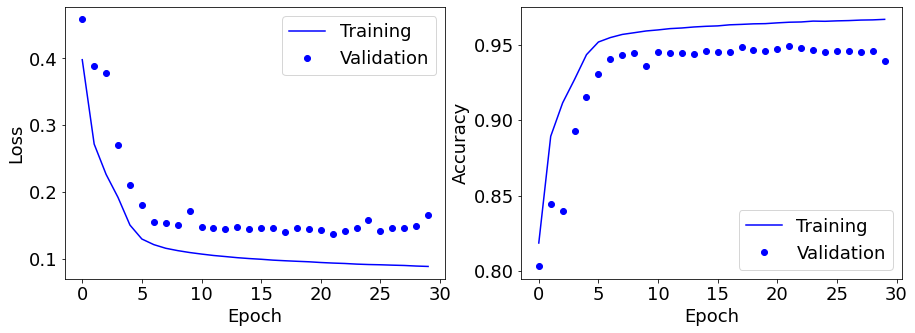

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(736360, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


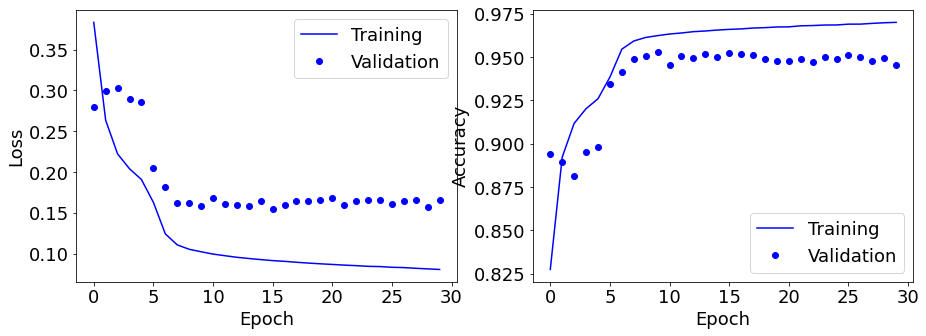

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(718400, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


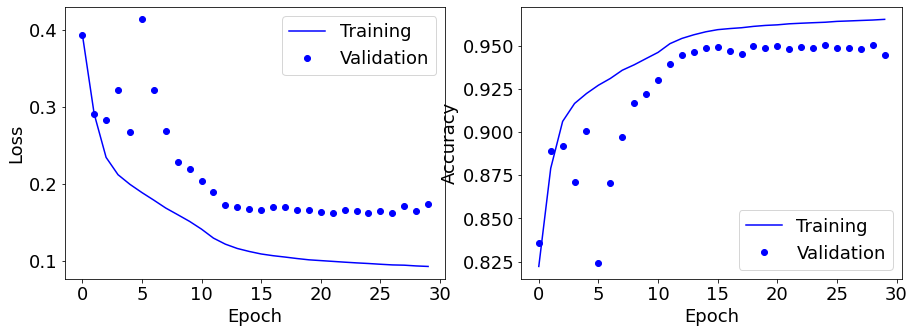

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
(682480, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


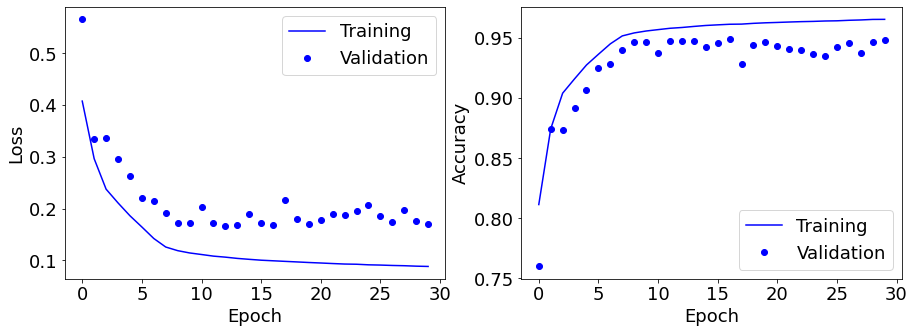

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
(664520, 50, 41)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


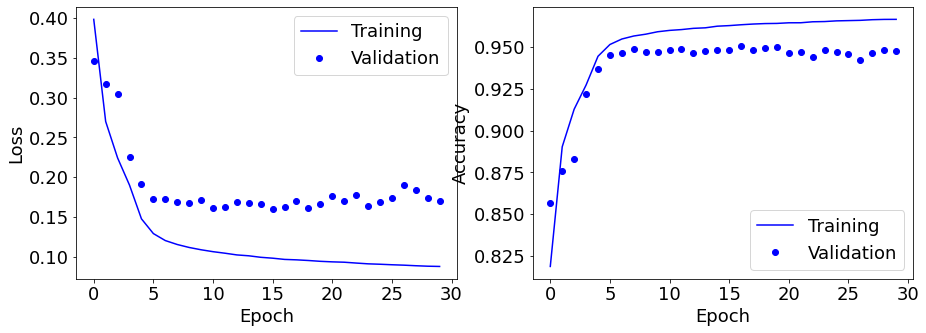

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(735950, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


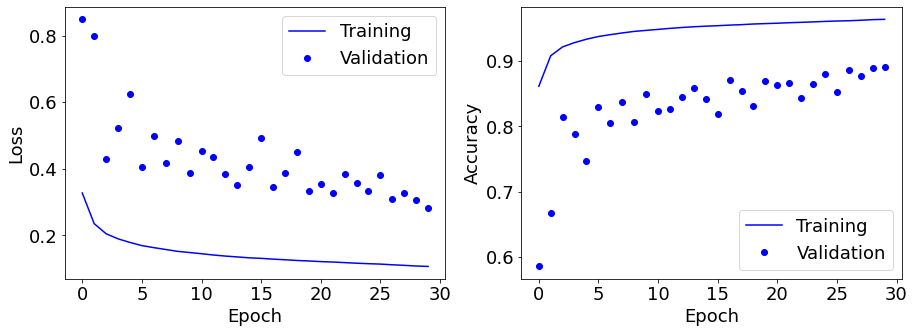

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(700050, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


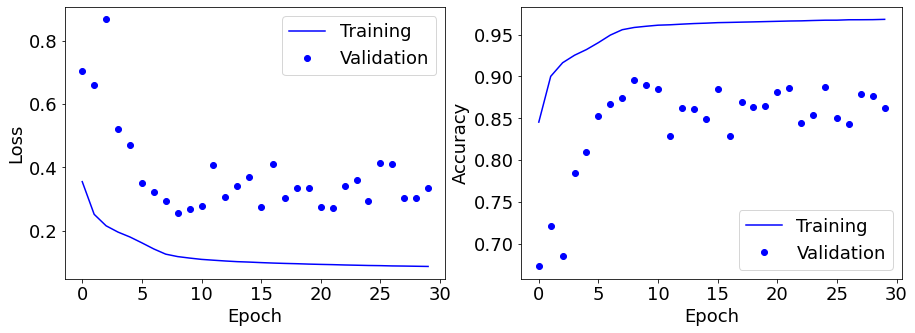

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(682100, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


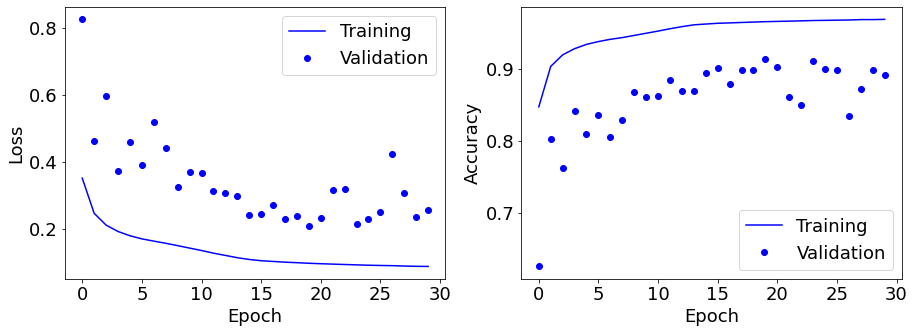

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(735950, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


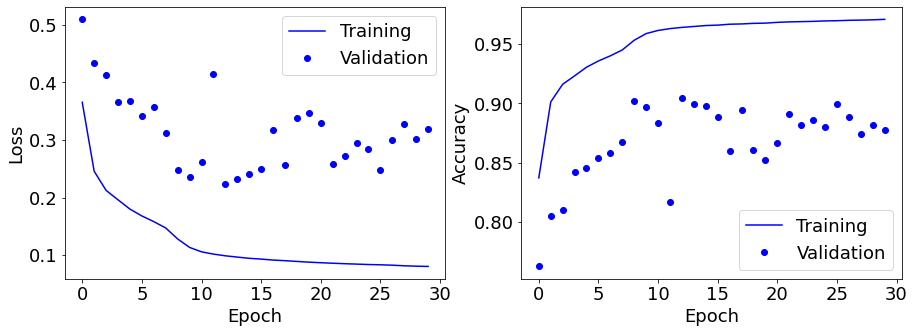

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(735950, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


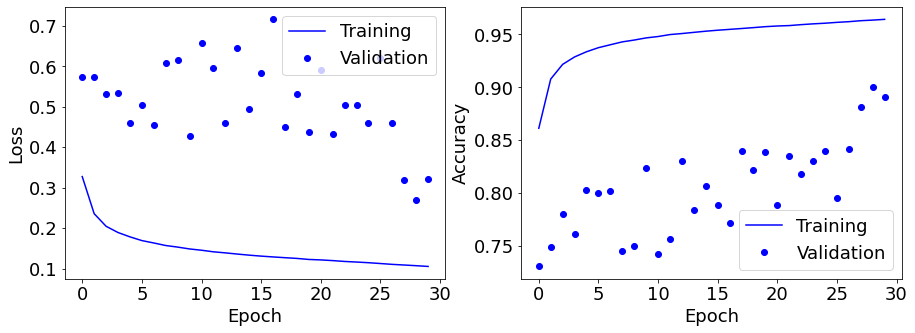

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(682100, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


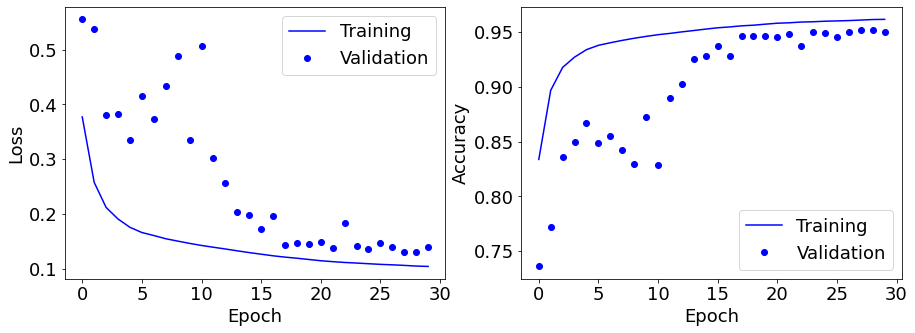

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(664150, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


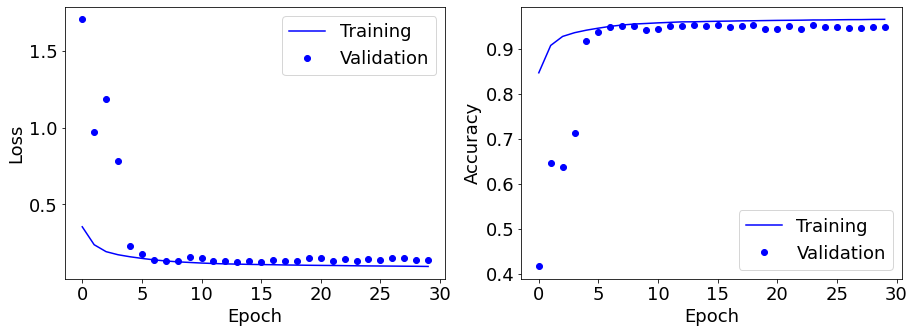

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(718000, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


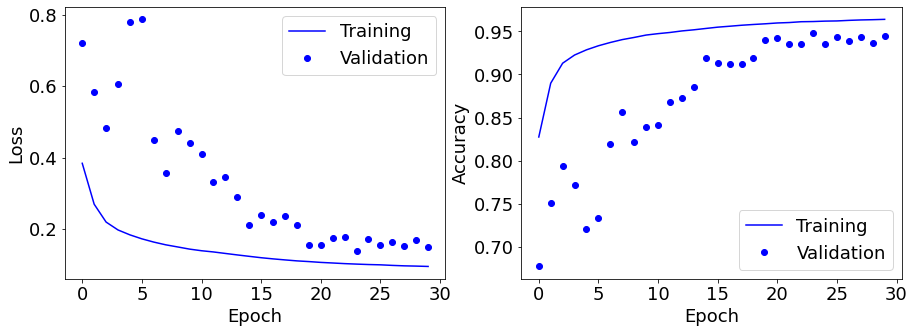

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(700050, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


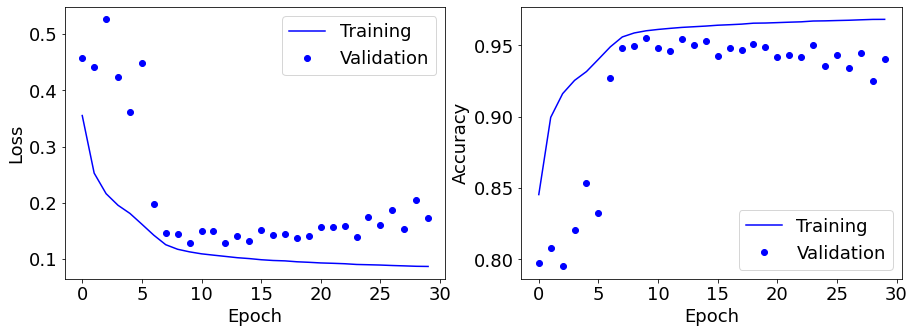

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(682100, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


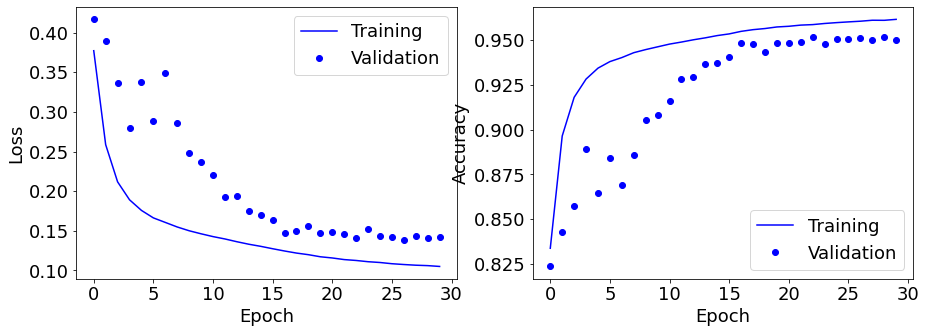

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
(628250, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


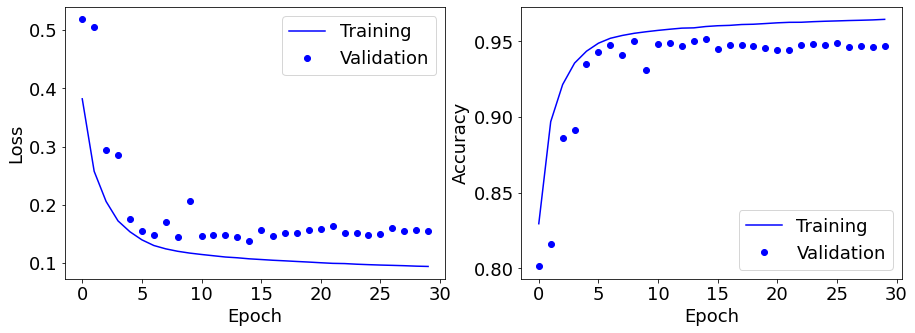

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
(682100, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


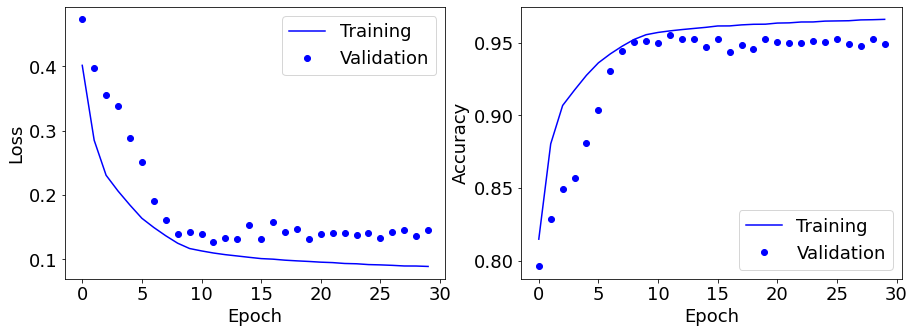

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(682100, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


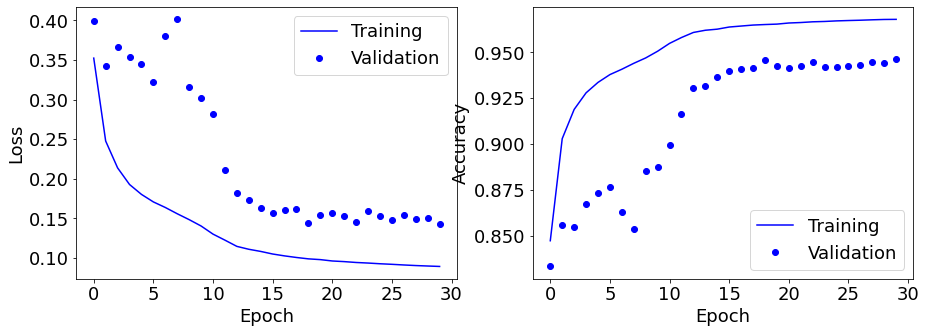

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(664150, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


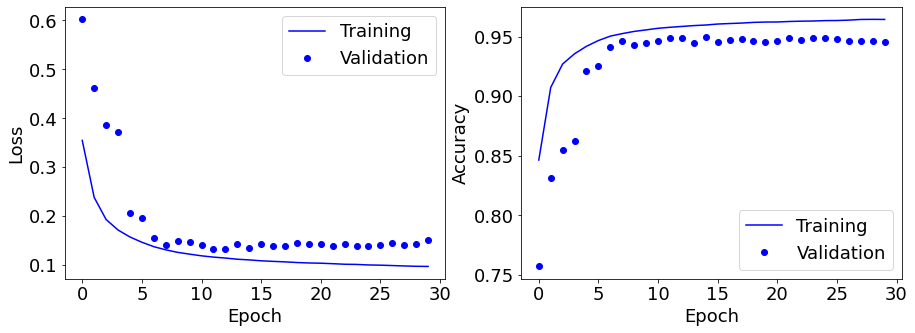

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
(628250, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


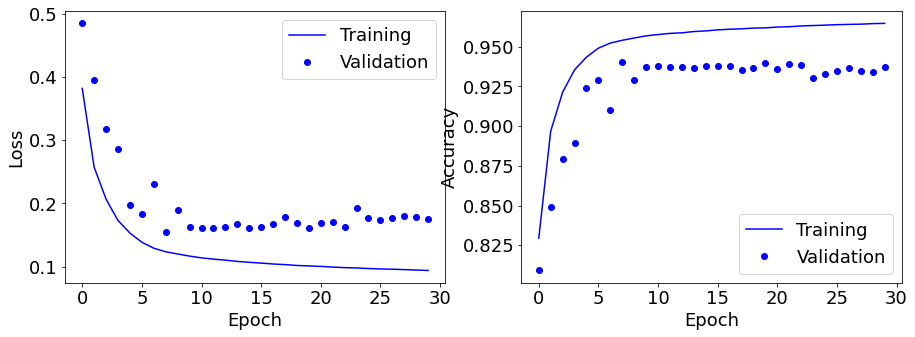

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
(664150, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


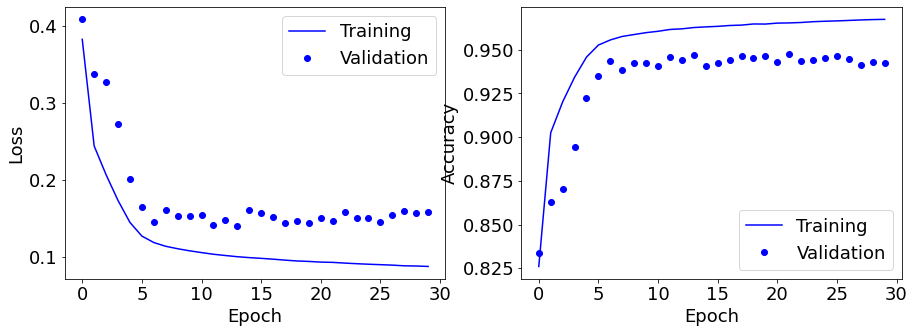

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(735950, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


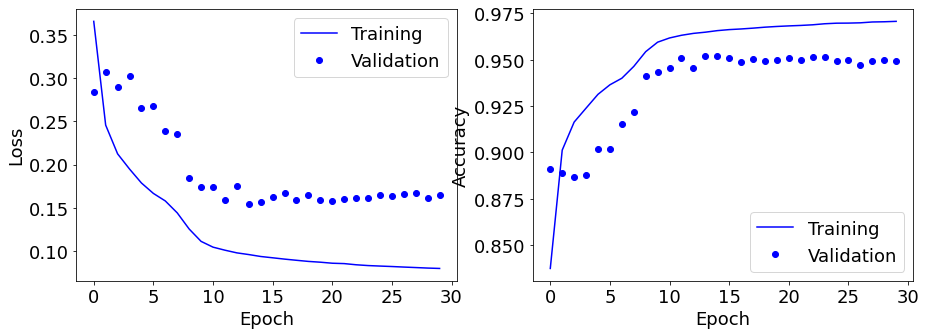

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(718000, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


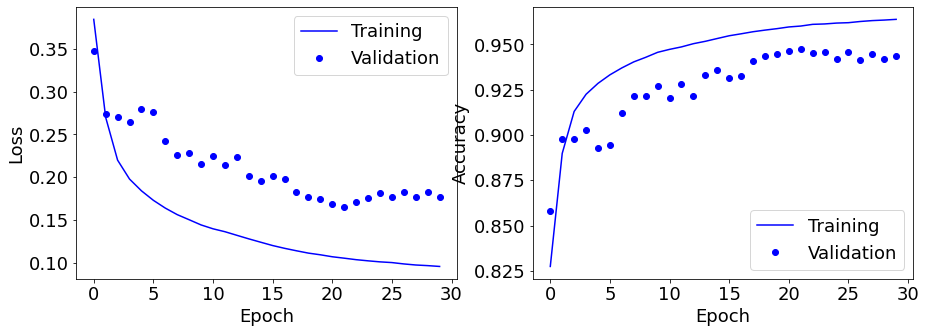

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
(682100, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


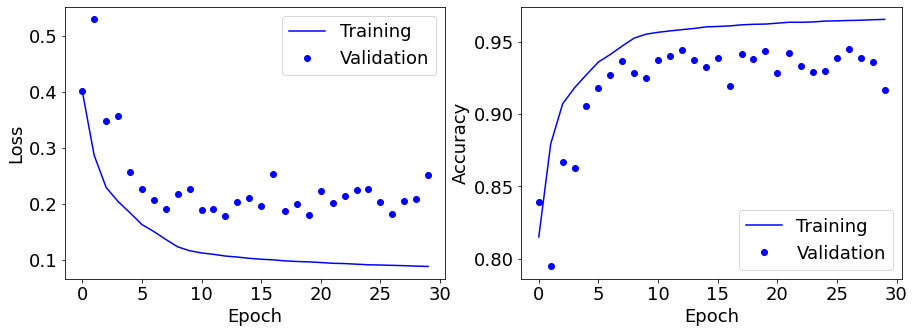

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
(664150, 50, 51)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


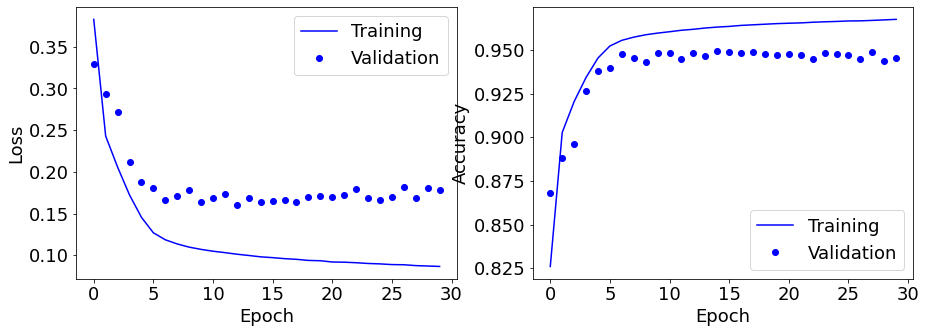

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(735540, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


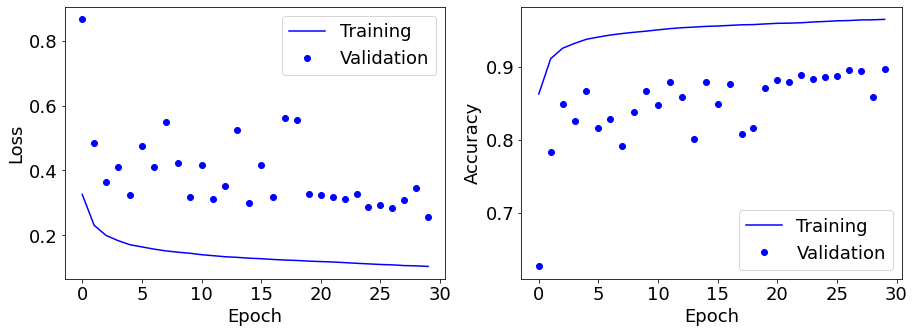

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(699660, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


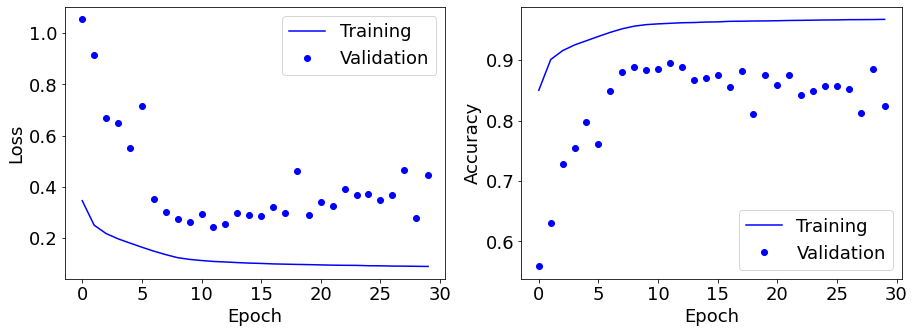

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


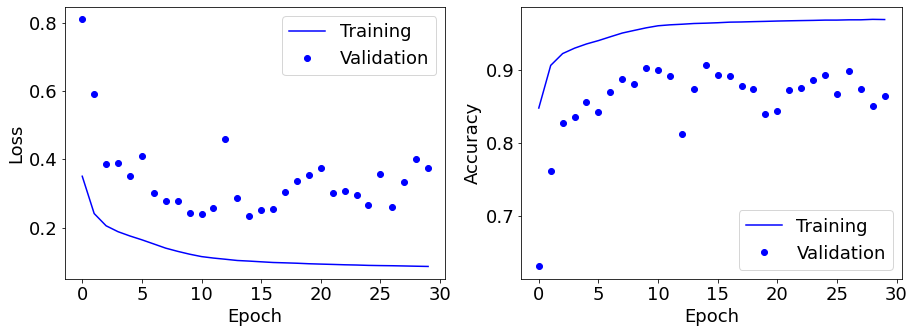

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(735540, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


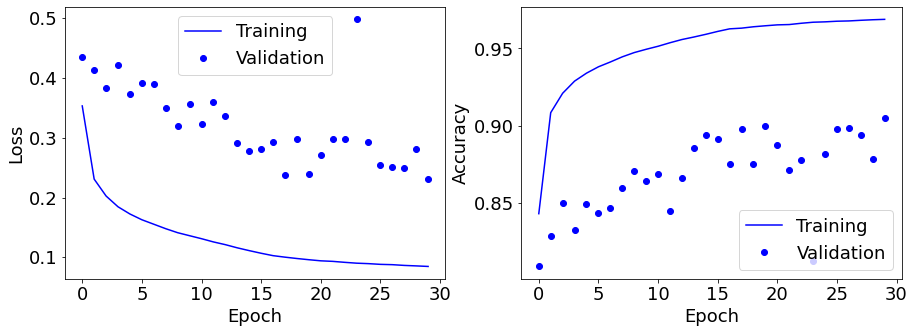

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(735540, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


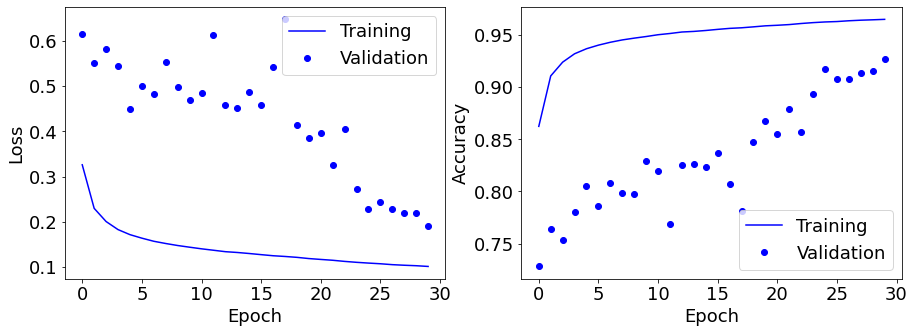

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


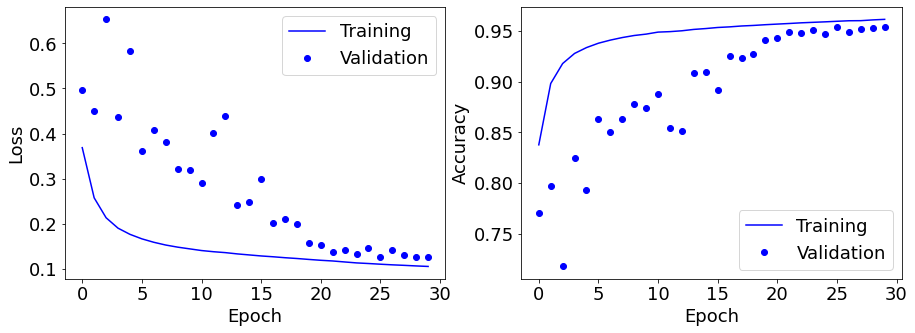

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(663780, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


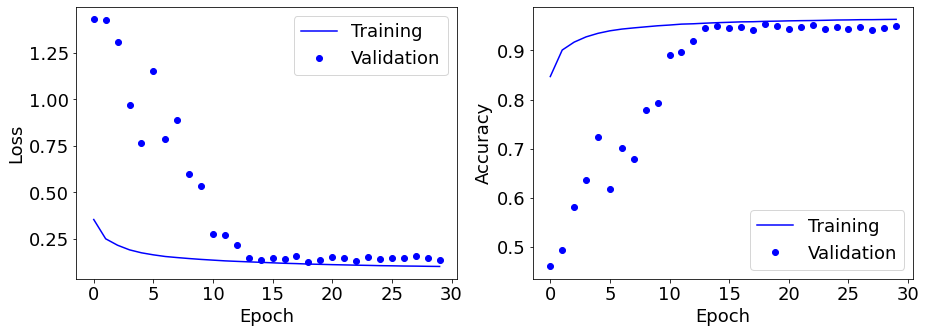

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(717600, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


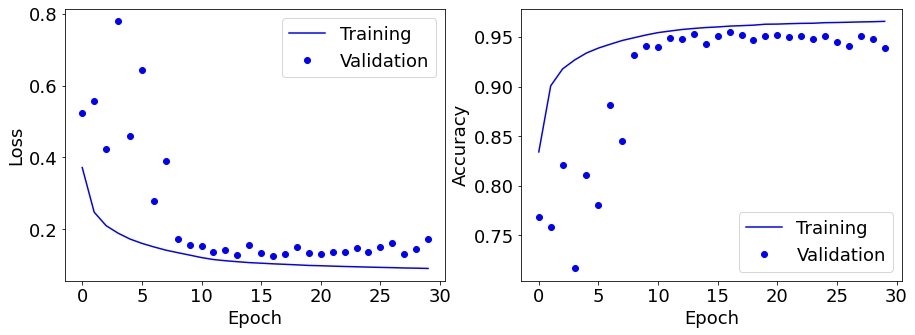

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(699660, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


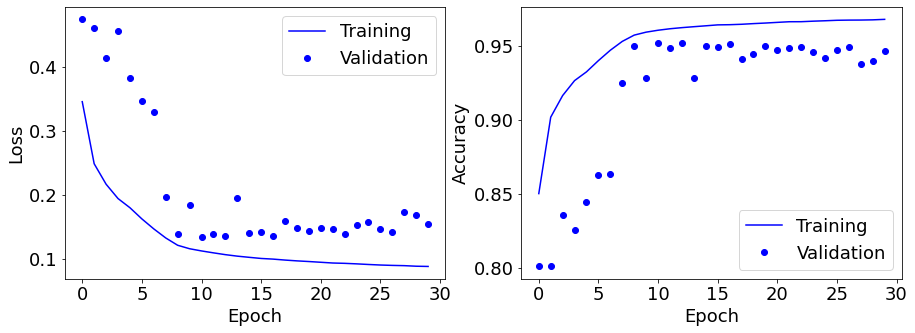

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


In [ ]:
import itertools
l = [1, 2, 3, 4, 5]
for look_frame in LookFrame:
    for v in itertools.permutations(l, 2):
        TRAIN = [i for i in l if i not in v]
        VALID = [v[0]]
        TEST = [v[1]]
        trainX, validX, trainY, validY = Get_Dataset(TRAIN, VALID, TEST, look_frame)
        print(trainX.shape)
        ver = f'{ModelType}_{VALID}_{TEST}_{look_frame}'
        history = Learn_model(trainX, validX, trainY, validY, ModelType, ver, folder)
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(acc))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        ax[0].plot(epochs, loss, 'b', label='Training')
        ax[0].plot(epochs, val_loss, 'bo', label='Validation')
        ax[0].set(xlabel="Epoch")
        ax[0].set(ylabel="Loss")
        ax[0].legend()
        ax[1].plot(epochs, acc, 'b', label='Training')
        ax[1].plot(epochs, val_acc, 'bo', label='Validation')
        ax[1].set(xlabel="Epoch")
        ax[1].set(ylabel="Accuracy")
        ax[1].legend()
        plt.show()
        del trainX, validX, trainY, validY

In [10]:
LookFrame = [30]
ModelType = 'GRU'
folder = './models_N20_WindowExpand/'

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(735540, 50, 61)


Using TensorFlow backend.
TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


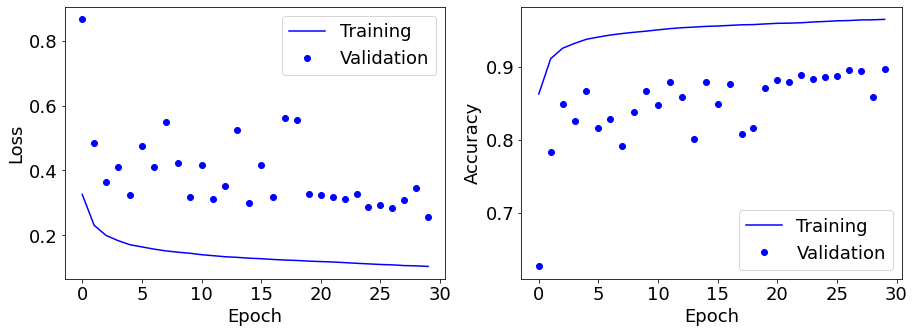

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 1
(699660, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


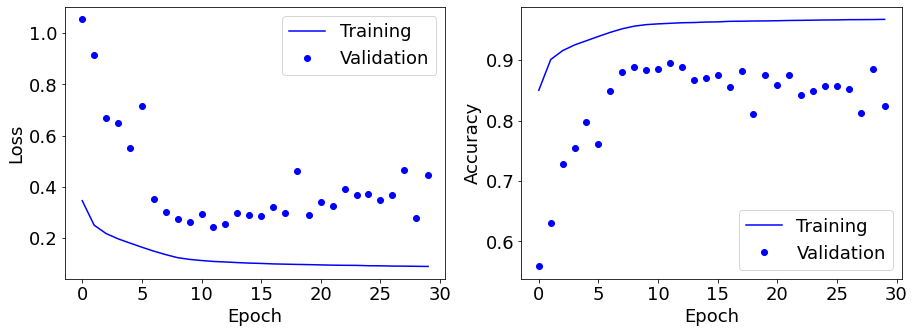

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 1
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


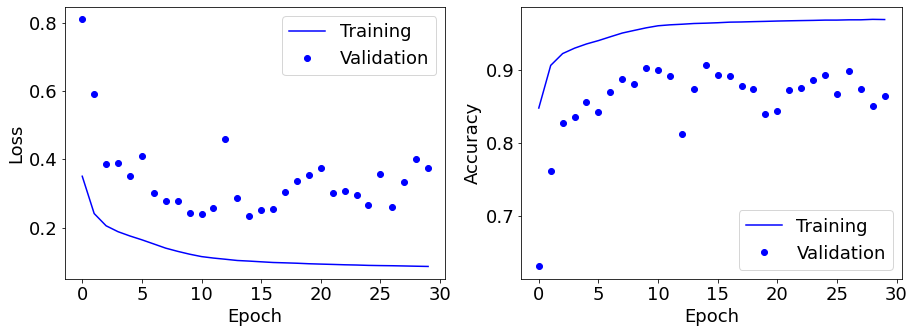

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 1
(735540, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


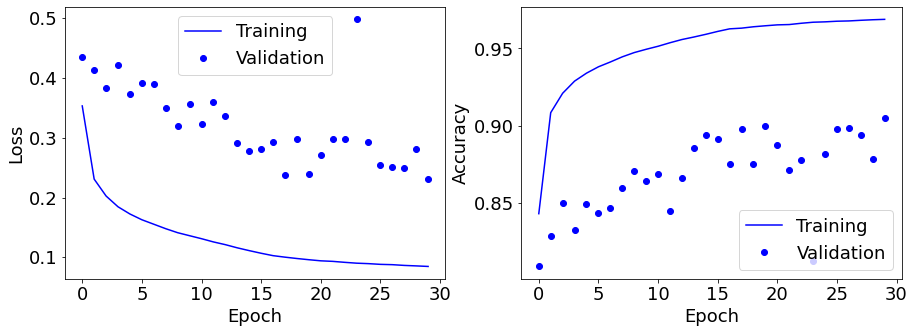

TRAINING
Mouse 3
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(735540, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


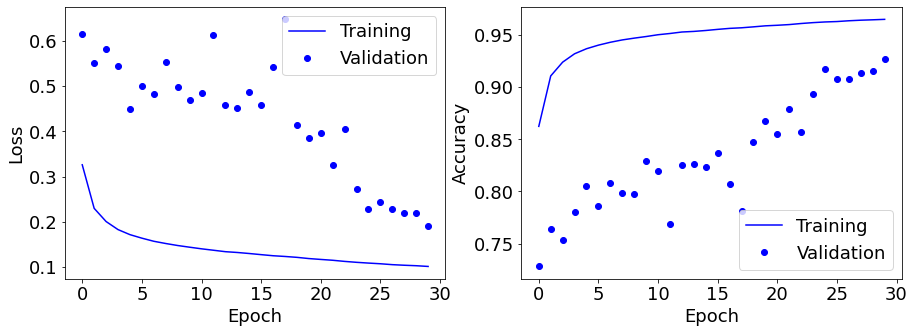

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 2
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


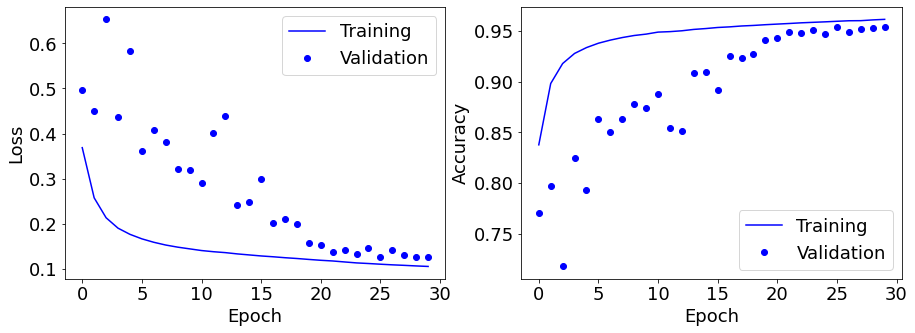

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 2
(663780, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


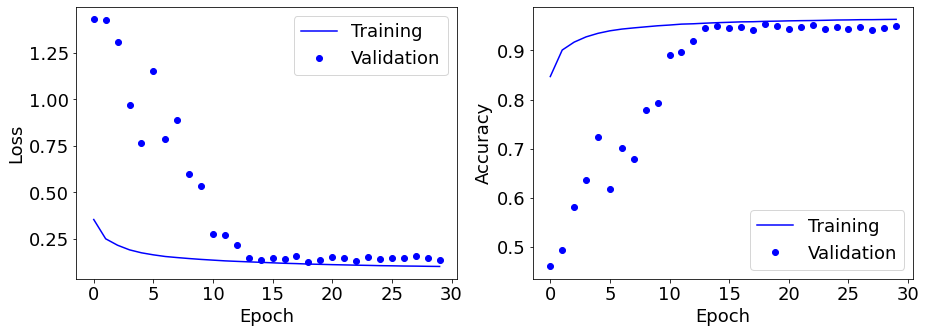

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 2
(717600, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


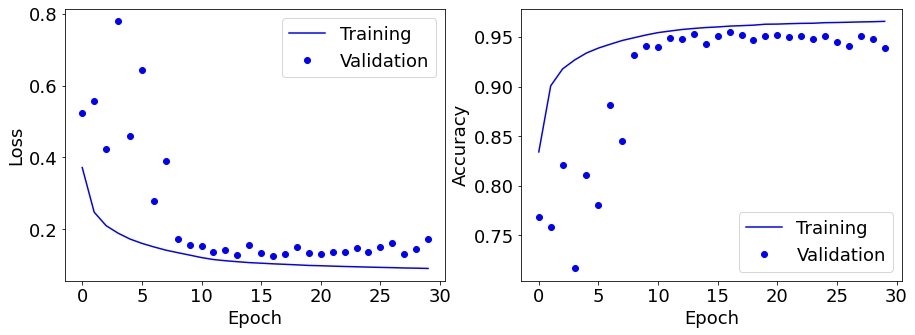

TRAINING
Mouse 2
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(699660, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


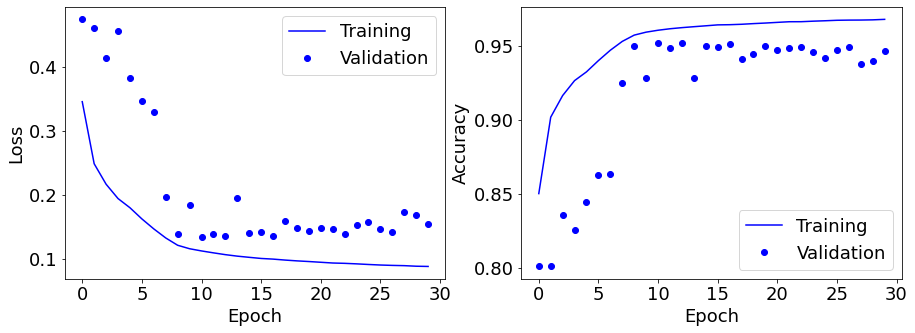

TRAINING
Mouse 1
Mouse 4
Mouse 5
VALIDATION
Mouse 3
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


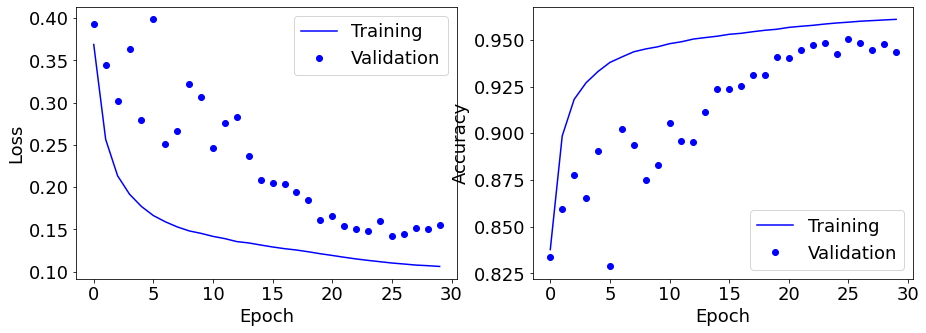

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 3
(627900, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


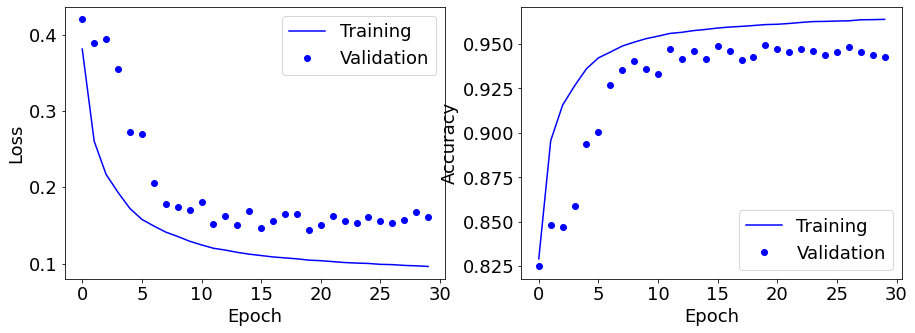

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 3
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


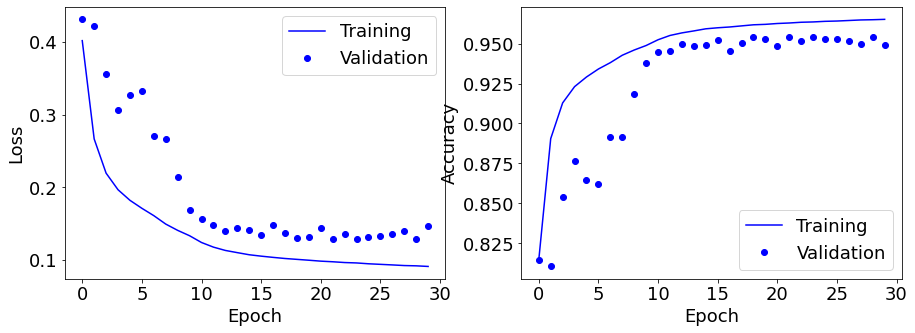

TRAINING
Mouse 2
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


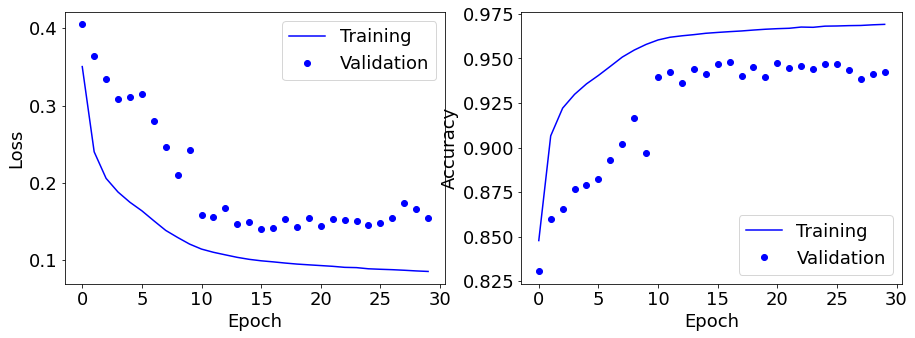

TRAINING
Mouse 1
Mouse 3
Mouse 5
VALIDATION
Mouse 4
(663780, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


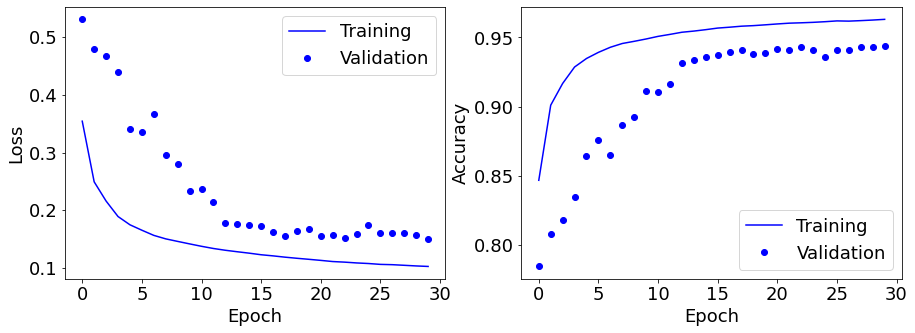

TRAINING
Mouse 1
Mouse 2
Mouse 5
VALIDATION
Mouse 4
(627900, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


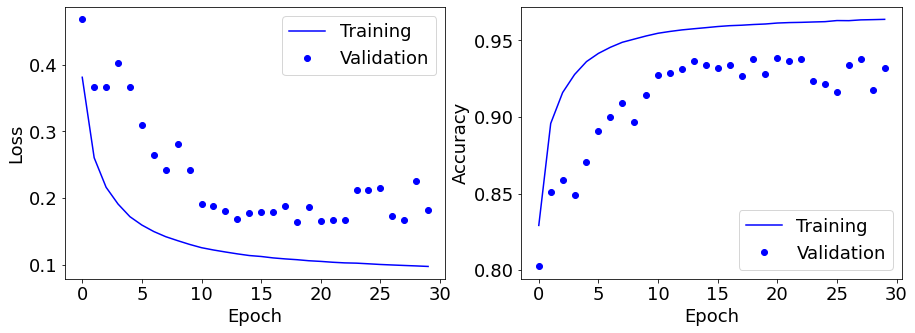

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 4
(663780, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


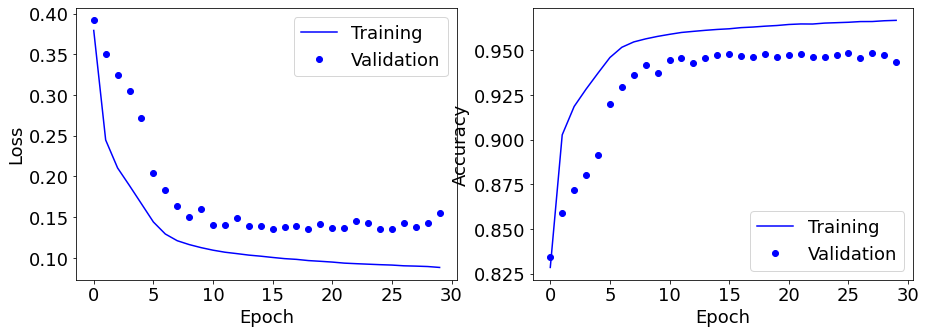

TRAINING
Mouse 2
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(735540, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


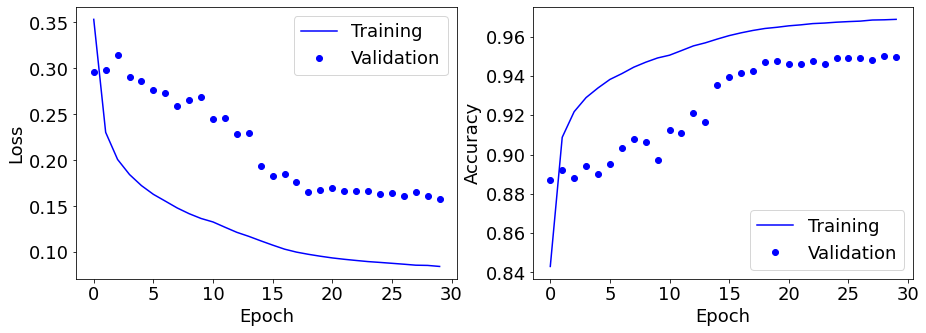

TRAINING
Mouse 1
Mouse 3
Mouse 4
VALIDATION
Mouse 5
(717600, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


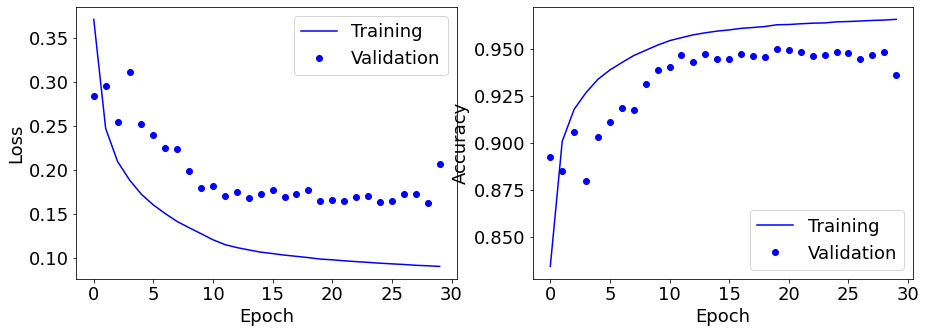

TRAINING
Mouse 1
Mouse 2
Mouse 4
VALIDATION
Mouse 5
(681720, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


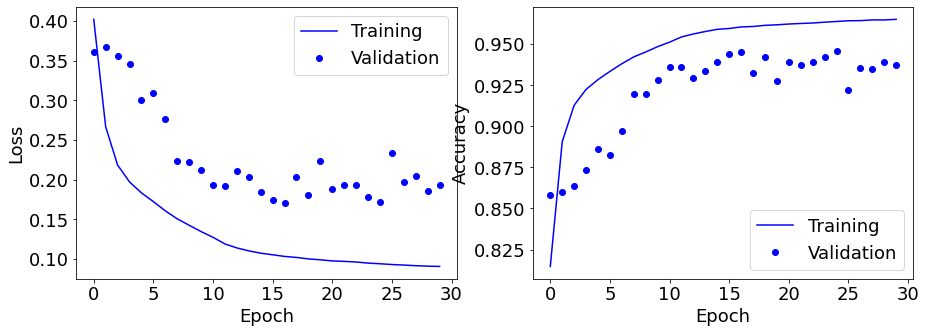

TRAINING
Mouse 1
Mouse 2
Mouse 3
VALIDATION
Mouse 5
(663780, 50, 61)


TensorFlow version 1.15.0 has been patched using tfdeterminism version 0.3.0


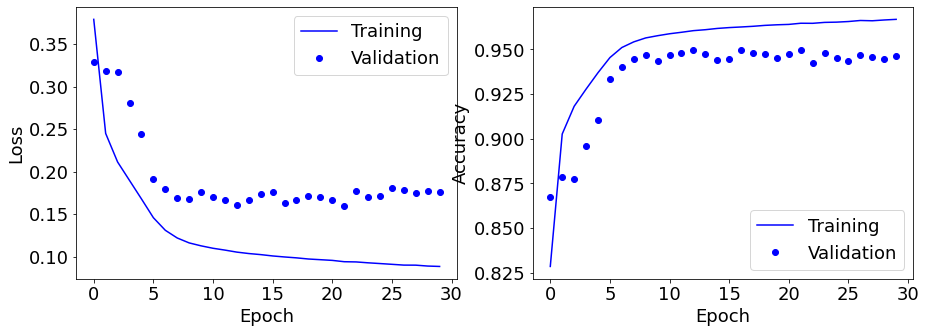

In [11]:
import itertools
l = [1, 2, 3, 4, 5]
for look_frame in LookFrame:
    for v in itertools.permutations(l, 2):
        TRAIN = [i for i in l if i not in v]
        VALID = [v[0]]
        TEST = [v[1]]
        trainX, validX, trainY, validY = Get_Dataset(TRAIN, VALID, TEST, look_frame)
        print(trainX.shape)
        ver = f'{ModelType}_{VALID}_{TEST}_{look_frame}'
        history = Learn_model(trainX, validX, trainY, validY, ModelType, ver, folder)
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(acc))
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        ax[0].plot(epochs, loss, 'b', label='Training')
        ax[0].plot(epochs, val_loss, 'bo', label='Validation')
        ax[0].set(xlabel="Epoch")
        ax[0].set(ylabel="Loss")
        ax[0].legend()
        ax[1].plot(epochs, acc, 'b', label='Training')
        ax[1].plot(epochs, val_acc, 'bo', label='Validation')
        ax[1].set(xlabel="Epoch")
        ax[1].set(ylabel="Accuracy")
        ax[1].legend()
        plt.show()
        del trainX, validX, trainY, validY